In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#df = pd.read_csv("CBS_2021-2023_Full.csv", sep =',')
df =pd.read_csv("cleaned_full_dataset.csv", sep =',')

df.head()

C:\Users\Tiba\AppData\Local\Temp\ipykernel_18244\1796213986.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("cleaned_full_dataset.csv", sep =',')


MemoryError: Unable to allocate 326. MiB for an array with shape (4, 10693997) and data type float64

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


start_lat     start_lng       end_lat       end_lng
count  1.069400e+07  1.069400e+07  1.067723e+07  1.067723e+07
mean   3.890330e+01 -7.703187e+01  3.890225e+01 -7.703146e+01
std    2.683876e-02  3.345893e-02  5.049321e-02  9.127760e-02
min    3.876000e+01 -7.740000e+01  0.000000e+00 -7.756000e+01
25%    3.889054e+01 -7.704460e+01  3.889050e+01 -7.704463e+01
50%    3.890276e+01 -7.703162e+01  3.890231e+01 -7.703150e+01
75%    3.891475e+01 -7.701367e+01  3.891265e+01 -7.701281e+01
max    3.914000e+01 -7.682000e+01  3.919000e+01  0.000000e+00

In [ ]:
print(f"Die Datei hat {len(df)} Zeilen.")

Die Datei hat 10693997 Zeilen.


In [ ]:
# Convert categorical columns to category type for memory efficiency
df["rideable_type"] = df["rideable_type"].astype("category")
df["start_station_name"] = df["start_station_name"].astype("category")
df["end_station_name"] = df["end_station_name"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")

# Convert timestamps to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
df['ride_id'] = pd.Series(range(1, len(df) + 1), dtype='uint32')

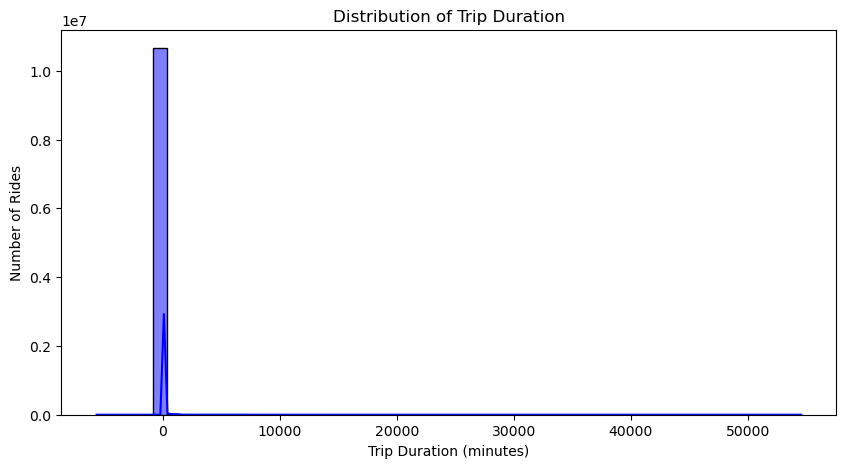

In [ ]:
# Goal: Understand how long users ride bikes on average.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert timestamps to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Calculate trip duration in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Plot distribution
plt.figure(figsize=(10,5))
sns.histplot(df["trip_duration"], bins=50, kde=True, color="blue")

# Labels & Title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Rides")
plt.title("Distribution of Trip Duration")

plt.show()


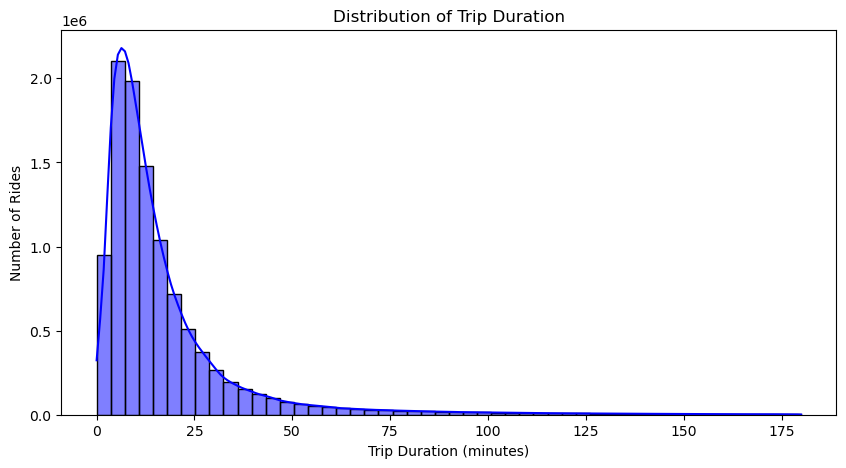

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert timestamps to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Calculate trip duration in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds() / 60

# Remove negative durations (if any)
df = df[df["trip_duration"] > 0]

# Remove extremely long trips (e.g., longer than 180 minutes / 3 hours)
df_filtered = df[df["trip_duration"] < 180]

# Plot cleaned distribution
plt.figure(figsize=(10,5))
sns.histplot(df_filtered["trip_duration"], bins=50, kde=True, color="blue")

# Labels & Title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Rides")
plt.title("Distribution of Trip Duration")

plt.show()


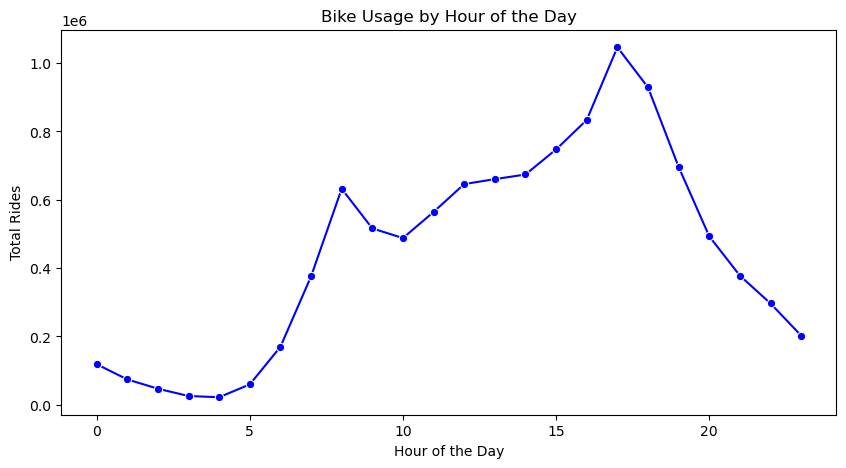

In [ ]:
# Find out at which times most trips happen.
# Extract hour from the start time
df["hour"] = df["started_at"].dt.hour

# Aggregate rides per hour
hourly_rides = df.groupby("hour")["ride_id"].count().reset_index()

# Plot line chart
plt.figure(figsize=(10,5))
sns.lineplot(x="hour", y="ride_id", data=hourly_rides, marker="o", color="blue")

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.title("Bike Usage by Hour of the Day")

plt.show()


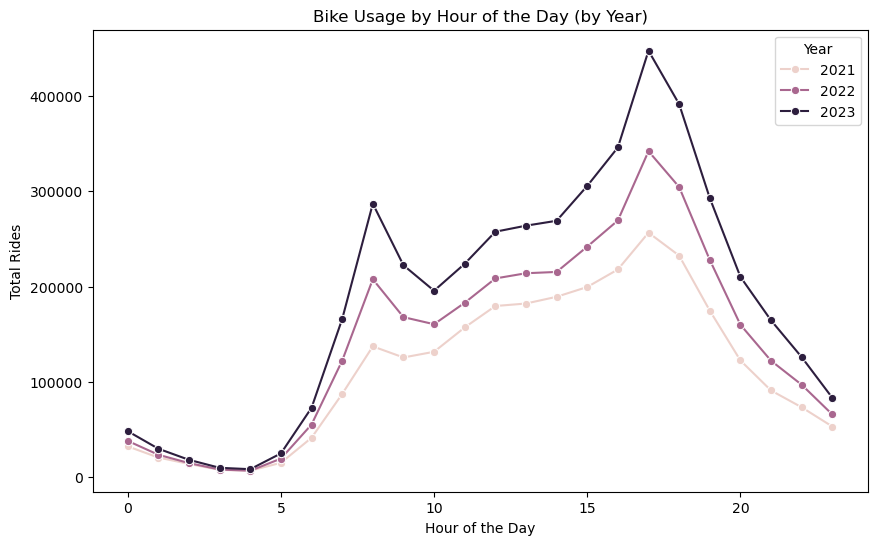

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Date column is in datetime format
df["started_at"] = pd.to_datetime(df["started_at"])

# Extract year and hour from the start time
df["year"] = df["started_at"].dt.year
df["hour"] = df["started_at"].dt.hour

# Aggregate rides per hour and year
hourly_rides_yearly = df.groupby(["year", "hour"])["ride_id"].count().reset_index()

# Plot line chart with multiple years
plt.figure(figsize=(10,6))
sns.lineplot(x="hour", y="ride_id", hue="year", data=hourly_rides_yearly, marker="o")

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Total Rides")
plt.title("Bike Usage by Hour of the Day (by Year)")

# Show legend
plt.legend(title="Year")

# Display plot
plt.show()


In [ ]:
# Remove missing or unknown start stations
df_clean_start = df.dropna(subset=["start_station_name"])
df_clean_start = df_clean_start[df_clean_start["start_station_name"] != "Unknown"]

# Count rides per start station (top 10)
popular_start_stations = df_clean_start["start_station_name"].value_counts().head(10)


C:\Users\Tiba\AppData\Local\Temp\ipykernel_15192\3618666224.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")


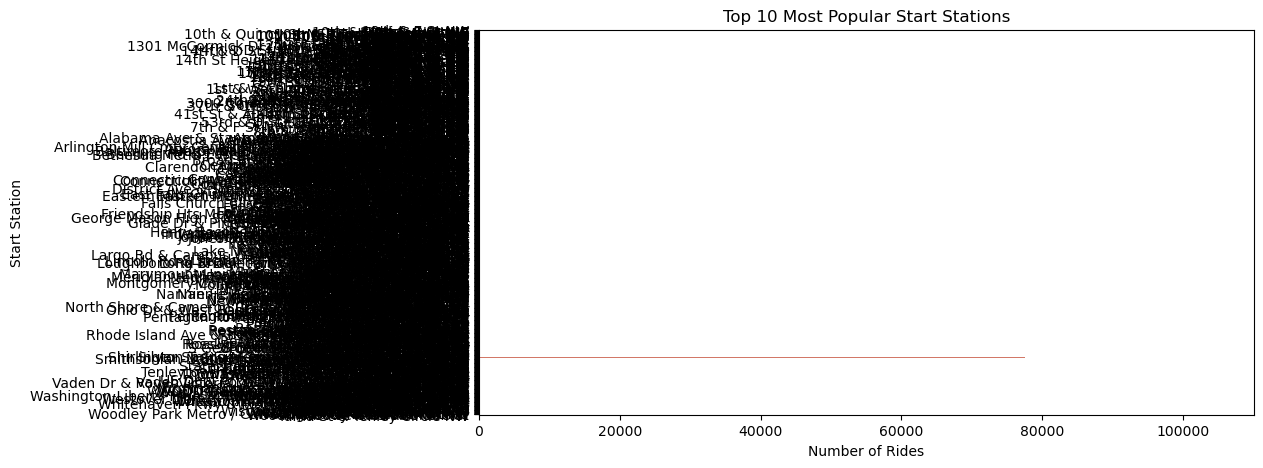

In [ ]:
#Goal: Find the most frequently used bike stations for start station
# Count rides per start station
popular_stations = df["start_station_name"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Top 10 Most Popular Start Stations")

plt.show()


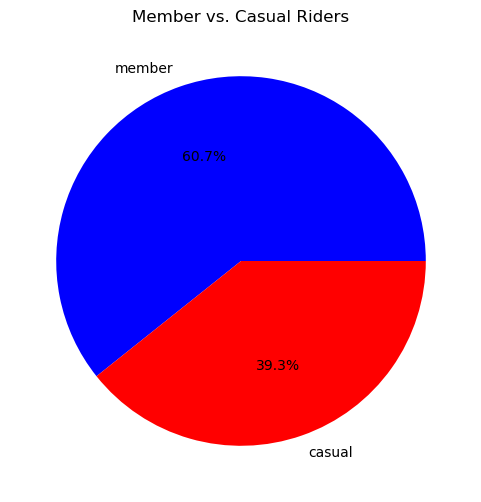

In [ ]:
#Goal: Find the most frequently used bike stations.
# Aggregate total rides by user type
user_type_rides = df["member_casual"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(user_type_rides, labels=user_type_rides.index, autopct='%1.1f%%', colors=["blue", "red"])
plt.title("Member vs. Casual Riders")

plt.show()


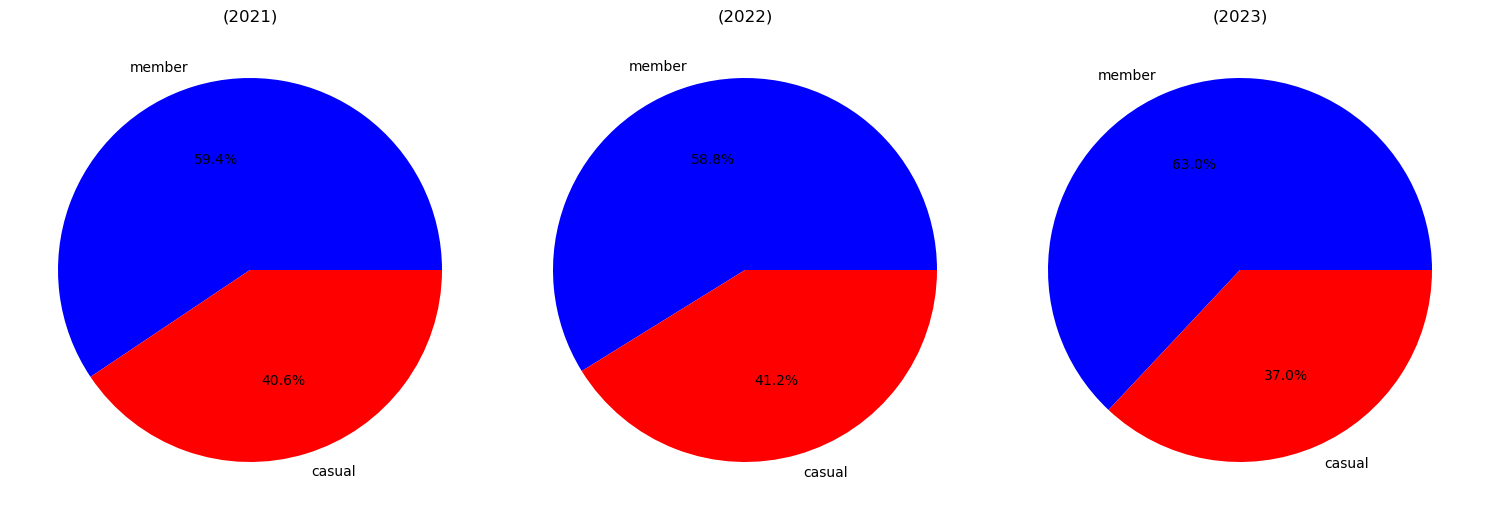

In [ ]:
import matplotlib.pyplot as plt

# Ensure Date column is in datetime format
df["started_at"] = pd.to_datetime(df["started_at"])

# Extract year from the started_at column
df["year"] = df["started_at"].dt.year

# Get unique years
years = df["year"].unique()

# Create subplots for each year
fig, axes = plt.subplots(1, len(years), figsize=(15,6))

# Loop through each year and create a pie chart
for i, year in enumerate(sorted(years)):
    # Filter data for the specific year
    user_type_rides = df[df["year"] == year]["member_casual"].value_counts()
    
    # Pie chart
    axes[i].pie(user_type_rides, labels=user_type_rides.index, autopct='%1.1f%%', colors=["blue", "red"])
    #axes[i].set_title(f"Member vs. Casual Riders ({year})")
    axes[i].set_title(f"({year})")

# Show plot
plt.tight_layout()
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_18276\715176800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_routes.values, y=popular_routes.index, palette="coolwarm")


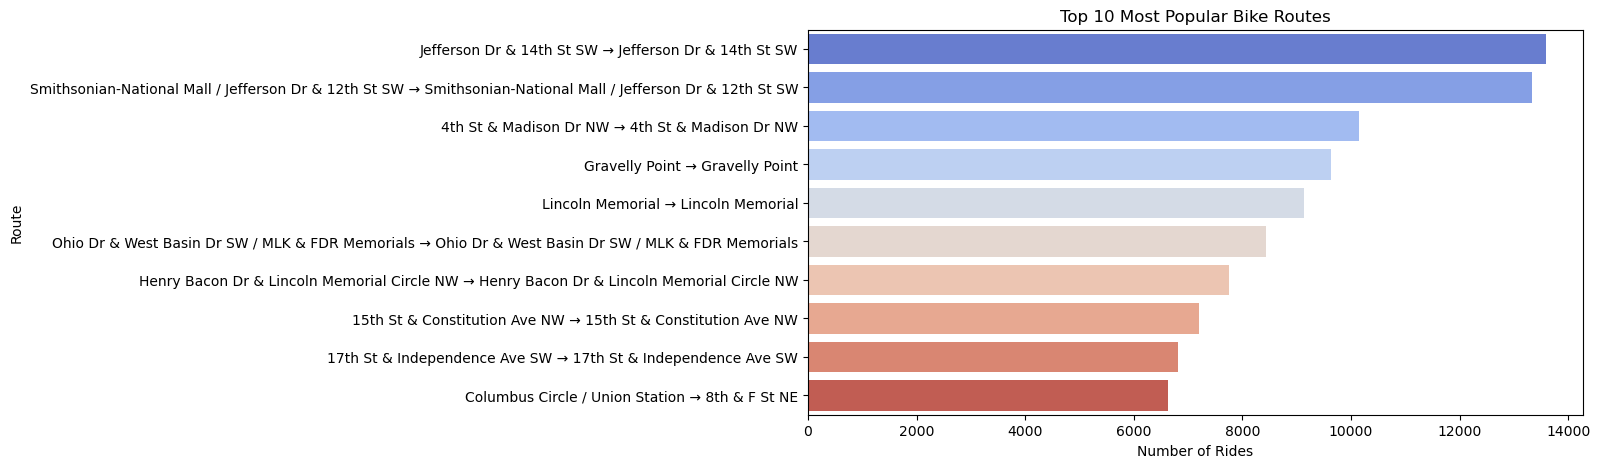

In [ ]:
#Goal: Identify the most frequently used routes.
# Create a new column for route (Start → End)
df["route"] = df["start_station_name"] + " → " + df["end_station_name"]

# Count top 10 most frequent routes
popular_routes = df["route"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=popular_routes.values, y=popular_routes.index, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Route")
plt.title("Top 10 Most Popular Bike Routes")

plt.show()


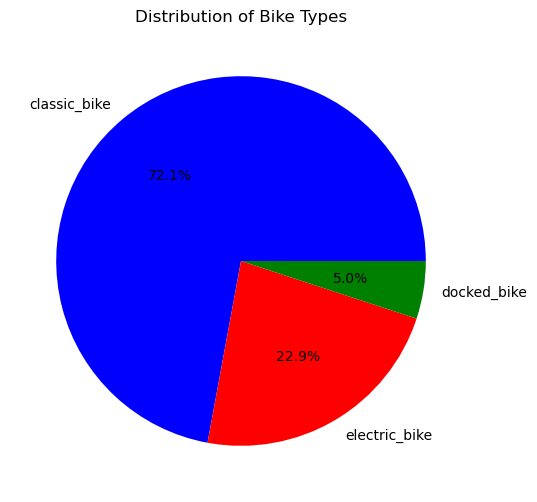

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of rides per bike type
bike_type_counts = df["rideable_type"].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(bike_type_counts, labels=bike_type_counts.index, autopct='%1.1f%%', colors=["blue", "red", "green"])
plt.title("Distribution of Bike Types")

# Show plot
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_15192\4141201441.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")


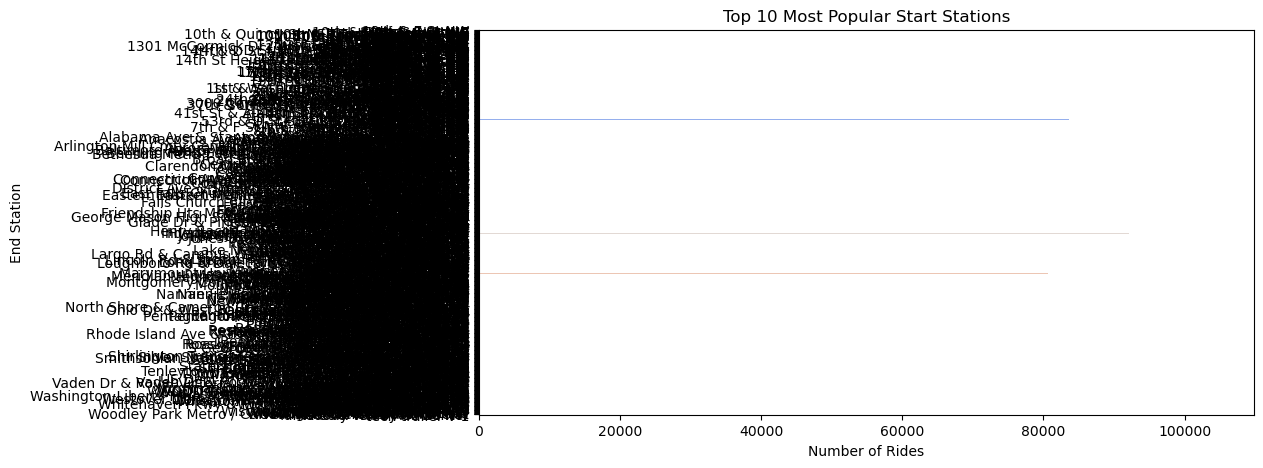

In [ ]:
#Goal: Find the most frequently used bike stations.
# Count rides per start station
popular_stations = df["end_station_name"].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=popular_stations.values, y=popular_stations.index, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("End Station")
plt.title("Top 10 Most Popular Start Stations")

plt.show()


In [ ]:
# Count the number of missing or unknown end station names
unknown_end_stations = df["end_station_name"].isnull().sum()
unknown_end_stations += (df["end_station_name"] == "Unknown").sum()

# Display result
unknown_end_stations


np.int64(811282)

In [ ]:
# Count the number of missing or unknown end station names
unknown_end_stations = df["start_station_name"].isnull().sum()
unknown_end_stations += (df["start_station_name"] == "Unknown").sum()

# Display result
unknown_end_stations


np.int64(742776)

C:\Users\Tiba\AppData\Local\Temp\ipykernel_15192\955566492.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_end_stations.index, x=popular_end_stations.values, palette="coolwarm")


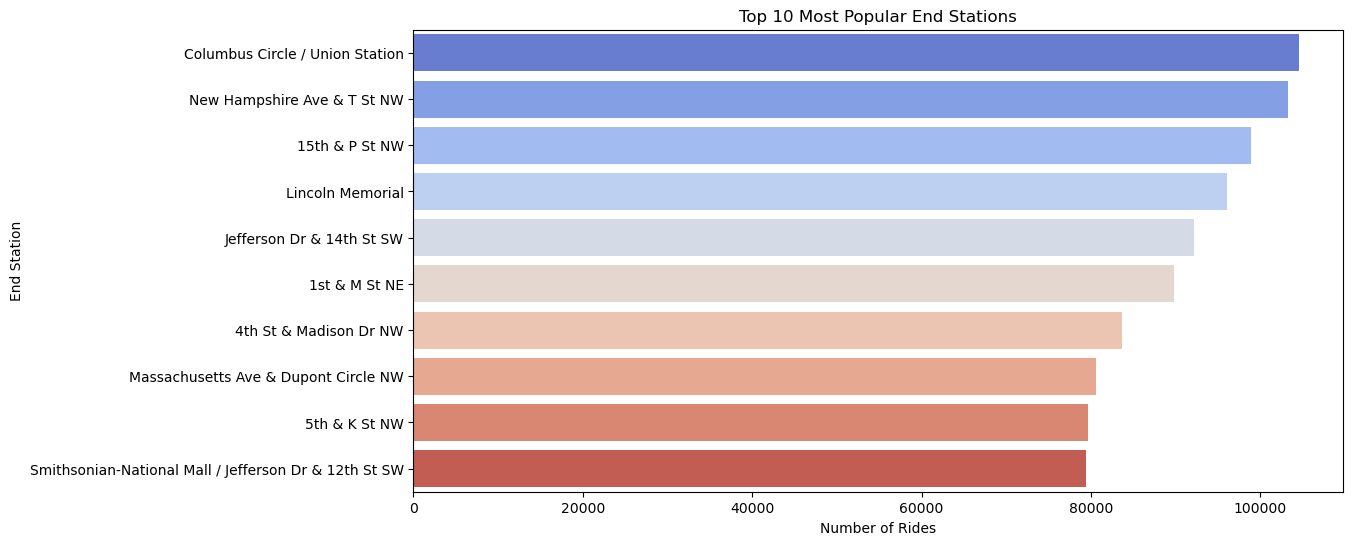

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove missing or unknown station names
df_clean = df.dropna(subset=["end_station_name"])  # Drop rows with missing end station names

# Count rides per end station (top 10)
popular_end_stations = df_clean["end_station_name"].value_counts().head(10)

# Ensure station names are stripped of extra spaces
popular_end_stations.index = popular_end_stations.index.str.strip()

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(y=popular_end_stations.index, x=popular_end_stations.values, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("End Station")
plt.title("Top 10 Most Popular End Stations")

plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_15192\3342509116.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_start_stations.index, x=popular_start_stations.values, palette="coolwarm")


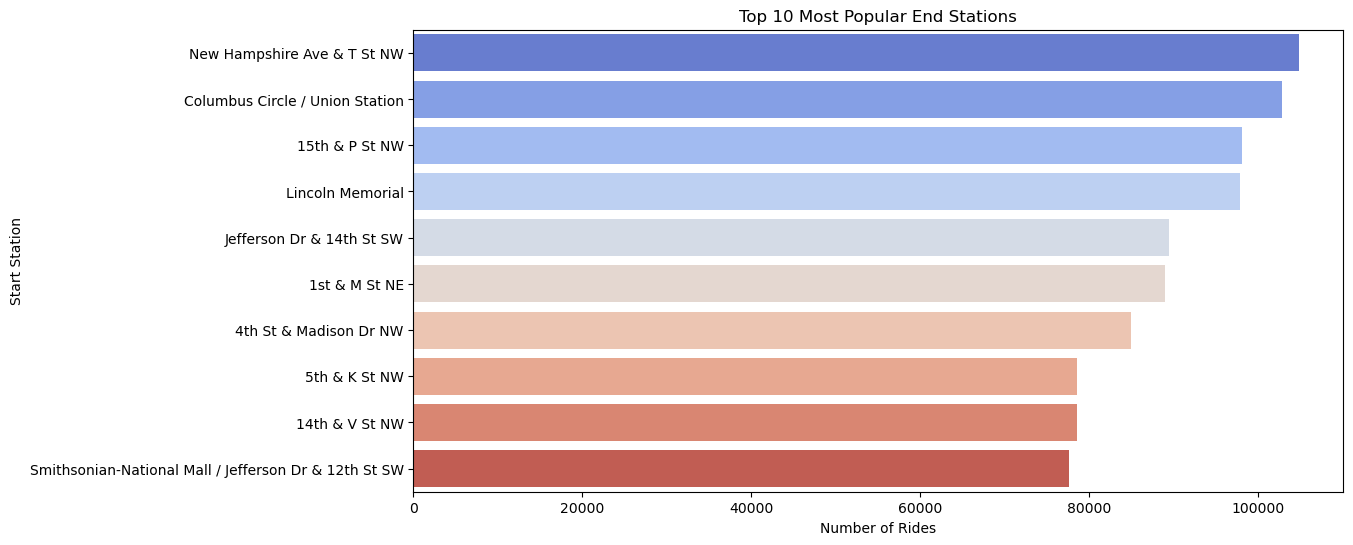

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove missing or unknown station names
df_clean = df.dropna(subset=["start_station_name"])  # Drop rows with missing start station names

# Count rides per end station (top 10)
popular_start_stations = df["start_station_name"].value_counts().head(10)

# Ensure station names are stripped of extra spaces
popular_start_stations.index = popular_start_stations.index.str.strip()

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(y=popular_start_stations.index, x=popular_start_stations.values, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Top 10 Most Popular End Stations")

plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_15192\1276698714.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_data.groupby(["start_station_name", "member_casual"])["ride_id"]


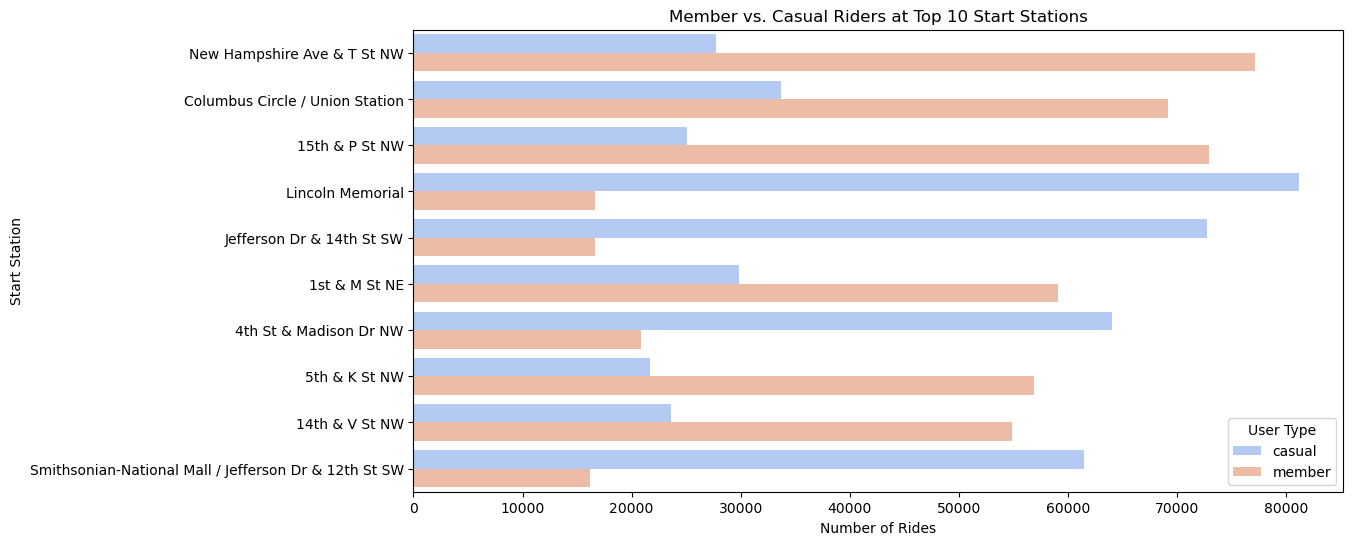

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove missing or unknown start stations
df_clean = df.dropna(subset=["start_station_name"])
df_clean = df_clean[df_clean["start_station_name"] != "Unknown"]

# Get the top 10 most used stations
popular_start_stations = df_clean["start_station_name"].value_counts().head(10).index.tolist()

# Filter data for only the top 10 stations
filtered_data = df_clean[df_clean["start_station_name"].isin(popular_start_stations)]

# Aggregate rides per station and user type
station_usage = (
    filtered_data.groupby(["start_station_name", "member_casual"])["ride_id"]
    .count()
    .reset_index()
)

# **Ensure only the top 10 stations are in the dataset**
station_usage = station_usage[station_usage["start_station_name"].isin(popular_start_stations)]

# **Set correct order for plotting**
station_usage["start_station_name"] = pd.Categorical(
    station_usage["start_station_name"], categories=popular_start_stations, ordered=True
)

# **Create bar chart**
plt.figure(figsize=(12,6))
sns.barplot(x="ride_id", y="start_station_name", hue="member_casual", data=station_usage, palette="coolwarm")

# Labels & Title
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Member vs. Casual Riders at Top 10 Start Stations")

# Show legend
plt.legend(title="User Type")

# Show plot
plt.show()


In [ ]:
num_start_stations = df.groupby("start_station_name")[["start_lat", "start_lng"]].nunique().query("start_lat > 1 or start_lng > 1").shape[0]
num_end_stations = df.groupby("end_station_name")[["end_lat", "end_lng"]].nunique().query("end_lat > 1 or end_lng > 1").shape[0]

print(num_start_stations)
print(num_end_stations)

850
731


In [ ]:
# Goal: Clean up the dataset by ensuring that each station has a unique set of coordinates.
import pandas as pd

# Ensure no missing values in station names and coordinates
df_clean = df.dropna(subset=["start_station_name", "start_lat", "start_lng", "end_station_name", "end_lat", "end_lng"])

# Get the top 10 most popular start stations using value_counts()
popular_start_stations = df_clean["start_station_name"].value_counts().head(10).index.tolist()

# Get the most common lat/lng for each start station
start_station_coords = (
    df_clean[df_clean["start_station_name"].isin(popular_start_stations)]
    .groupby(["start_station_name", "start_lat", "start_lng"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .drop_duplicates(subset=["start_station_name"])
    .drop(columns=["count"])
    .rename(columns={"start_station_name": "station_name", "start_lat": "lat", "start_lng": "lng"})
)
start_station_coords["type"] = "Start Station"

# Get the top 10 most popular end stations using value_counts()
popular_end_stations = df_clean["end_station_name"].value_counts().head(10).index.tolist()

# Get the most common lat/lng for each end station
end_station_coords = (
    df_clean[df_clean["end_station_name"].isin(popular_end_stations)]
    .groupby(["end_station_name", "end_lat", "end_lng"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .drop_duplicates(subset=["end_station_name"])
    .drop(columns=["count"])
    .rename(columns={"end_station_name": "station_name", "end_lat": "lat", "end_lng": "lng"})
)
end_station_coords["type"] = "End Station"

# Combine both start and end stations into one DataFrame
top_20_stations = pd.concat([start_station_coords, end_station_coords], ignore_index=True)

# Save the cleaned data to a CSV file
file_path_top_20_stations = "top_20_start_end_stations_fixed.csv"
top_20_stations.to_csv(file_path_top_20_stations, index=False)

# Provide the file path for download
file_path_top_20_stations


'top_20_start_end_stations_fixed.csv'

In [ ]:
# Goal: Visualize the top 20 start and end stations on a map
import folium
import pandas as pd
# Reload the corrected top 10 stations CSV file
top_stations_corrected = pd.read_csv("top_20_start_end_stations_fixed.csv")

# Count occurrences of each station
station_counts = top_stations_corrected["station_name"].value_counts()
print(station_counts)

# Identify stations that appear in both start and end lists (should be exactly 8)
both_types_stations = station_counts[station_counts > 1].index.tolist()

# Identify stations that are only Start Stations (should be 1)
start_only_stations = top_stations_corrected[(top_stations_corrected["type"] == "Start Station") & 
                                             (~top_stations_corrected["station_name"].isin(both_types_stations))]

# Identify stations that are only End Stations (should be 1)
end_only_stations = top_stations_corrected[(top_stations_corrected["type"] == "End Station") & 
                                           (~top_stations_corrected["station_name"].isin(both_types_stations))]

# Create a Folium map centered on Washington, D.C.
dc_map = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

# Add markers for Start, End, and Both-type stations
for _, row in top_stations_corrected.iterrows():
    if row["station_name"] in both_types_stations:
        color = "purple"  # Shared Start & End Stations (8 stations)
    elif row["station_name"] in start_only_stations["station_name"].tolist():
        color = "blue"  # Only Start Station (2 station)
    elif row["station_name"] in end_only_stations["station_name"].tolist():
        color = "green"  # Only End Station (2 station)

    folium.Marker(
        location=[row["lat"], row["lng"]],
        popup=f" {row['station_name']}",
        icon=folium.Icon(color=color, icon="info-sign"),
    ).add_to(dc_map)

legend_html = '''
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 250px; height: 120px; 
            background-color: white; z-index:9999; font-size:14px;
            padding: 10px; border-radius: 5px; box-shadow: 0px 0px 5px rgba(0,0,0,0.3);">
    <b>Legend:</b><br>
    <i class="fa fa-map-marker fa-2x" style="color:blue"></i> Start-Only Station  <br>
    <i class="fa fa-map-marker fa-2x" style="color:green"></i> End-Only Station  <br>
    <i class="fa fa-map-marker fa-2x" style="color:purple"></i> Both Start & End  <br>
</div>
'''
dc_map.get_root().html.add_child(folium.Element(legend_html))


# Save the corrected map
corrected_map_file_path = "top_stations_map_V3.html"
dc_map.save(corrected_map_file_path)

# Provide the file for download
corrected_map_file_path


station_name
New Hampshire Ave & T St NW                              2
Columbus Circle / Union Station                          2
15th & P St NW                                           2
1st & M St NE                                            2
Smithsonian-National Mall / Jefferson Dr & 12th St SW    2
5th & K St NW                                            2
Lincoln Memorial                                         2
4th St & Madison Dr NW                                   2
Jefferson Dr & 14th St SW                                2
Henry Bacon Dr & Lincoln Memorial Circle NW              1
Massachusetts Ave & Dupont Circle NW                     1
Name: count, dtype: int64


'top_stations_map_V3.html'

In [ ]:
#Clean lage dataset duplicated station name with differnece lat/lng

import pandas as pd


# Ensure no missing values in station names and coordinates
df_clean = df.dropna(subset=["start_station_name", "start_lat", "start_lng", "end_station_name", "end_lat", "end_lng"])

# Function to find the most frequently used lat/lng for each station
def get_most_common_coordinates(df, station_column, lat_column, lng_column):
    return (
        df.groupby([station_column, lat_column, lng_column])
        .size()
        .reset_index(name="count")  # Count occurrences of each lat/lng
        .sort_values(by="count", ascending=False)  # Sort to get the most used lat/lng
        .drop_duplicates(subset=[station_column])  # Keep only the most common lat/lng per station
        .drop(columns=["count"])  # Remove count column after sorting
        .rename(columns={station_column: "station_name", lat_column: "lat", lng_column: "lng"})  # Rename columns
    )

# Get the most common coordinates for Start and End Stations
start_station_coords = get_most_common_coordinates(df_clean, "start_station_name", "start_lat", "start_lng")
end_station_coords = get_most_common_coordinates(df_clean, "end_station_name", "end_lat", "end_lng")

# Map the cleaned coordinates back to the full dataset
df = df.merge(start_station_coords, how="left", left_on="start_station_name", right_on="station_name")
df = df.merge(end_station_coords, how="left", left_on="end_station_name", right_on="station_name", suffixes=("_start", "_end"))

# Replace old coordinates with cleaned ones
df["start_lat"] = df["lat_start"].fillna(df["start_lat"])
df["start_lng"] = df["lng_start"].fillna(df["start_lng"])
df["end_lat"] = df["lat_end"].fillna(df["end_lat"])
df["end_lng"] = df["lng_end"].fillna(df["end_lng"])

# Drop extra columns
df = df.drop(columns=["station_name_start", "station_name_end", "lat_start", "lng_start", "lat_end", "lng_end"])

# Save the updated dataset with cleaned station coordinates
df.to_csv("cleaned_full_dataset.csv", index=False)  # Saves locally

print("✅ Full dataset saved with corrected coordinates as 'cleaned_full_dataset.csv'")


✅ Full dataset saved with corrected coordinates as 'cleaned_full_dataset.csv'


In [ ]:
df = pd.read_csv("cleaned_full_dataset.csv", sep =',')

df.head()

C:\Users\Tiba\AppData\Local\Temp\ipykernel_5388\4257430170.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_full_dataset.csv", sep =',')


ride_id  rideable_type           started_at             ended_at  \
0  5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33  2021-01-01 00:33:53   
1  629E059504606547  electric_bike  2021-01-01 00:13:43  2021-01-01 00:29:34   
2  E74069873161EE33  electric_bike  2021-01-01 00:14:32  2021-01-01 00:28:45   
3  91F95E512CABC46A   classic_bike  2021-01-01 00:15:45  2021-01-01 00:21:20   
4  DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46  2021-01-01 00:21:00   

              start_station_name start_station_id  \
0          Maine Ave & 9th St SW          31646.0   
1                 10th & U St NW          31111.0   
2          17th & Corcoran St NW          31214.0   
3  Wilson Blvd. & N. Vermont St.          31926.0   
4              11th & Park Rd NW          31651.0   

                           end_station_name end_station_id  start_lat  \
0  Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                       NaN            NaN  38.917200   
2                      14th & Belmont St NW        31119.0  38.912100   
3             Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                       14th & Newton St NW        31649.0  38.931322   

   start_lng    end_lat    end_lng member_casual  
0 -77.025236  38.894600 -77.072305        member  
1 -77.025900  38.960000 -77.020000        casual  
2 -77.038700  38.921074 -77.031887        member  
3 -77.114563  38.879477 -77.114563        member  
4 -77.028247  38.931991 -77.032956        member

In [ ]:
num_start_stations = df.groupby("start_station_name")[["start_lat", "start_lng"]].nunique().query("start_lat > 1 or start_lng > 1").shape[0]
num_end_stations = df.groupby("end_station_name")[["end_lat", "end_lng"]].nunique().query("end_lat > 1 or end_lng > 1").shape[0]

print(num_start_stations)
print(num_end_stations)

0
0


In [ ]:
# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c  # Distance in km

# Apply the function row-wise
fdf['distance'] = fdf.apply(lambda row: haversine(row['start_lat'], 
                                                row['start_lng'], 
                                                row['end_lat'], 
                                                row['end_lng']), 
                                                axis=1)

In [ ]:
import pandas as pd

# Stelle sicher, dass started_at ein datetime-Format ist
df["started_at"] = pd.to_datetime(df["started_at"])

# Extrahiere die Stunde aus dem Startzeitpunkt
df["start_hour"] = df["started_at"].dt.hour

# Gruppiere nach Stunde und Startstation
hourly_usage = (
    df.groupby(["start_station_name", "start_hour"])
    .size()
    .reset_index(name="ride_count")
)

# Finde für jede Station die Stunde mit den meisten Fahrten
peak_usage_per_station = (
    hourly_usage.sort_values("ride_count", ascending=False)
    .drop_duplicates(subset=["start_station_name"])
    .sort_values("start_station_name")
    .reset_index(drop=True)
)



C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\3968174678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_start_stations.index, x=top_start_stations.values, palette="coolwarm")


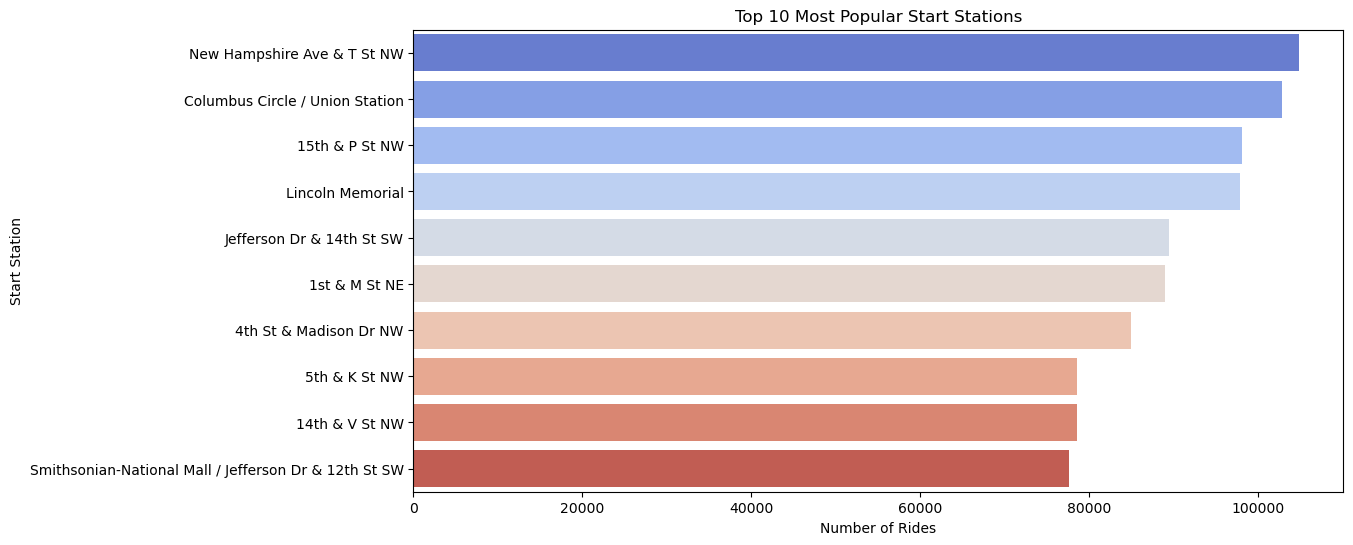

C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\3968174678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_end_stations.index, x=top_end_stations.values, palette="coolwarm")


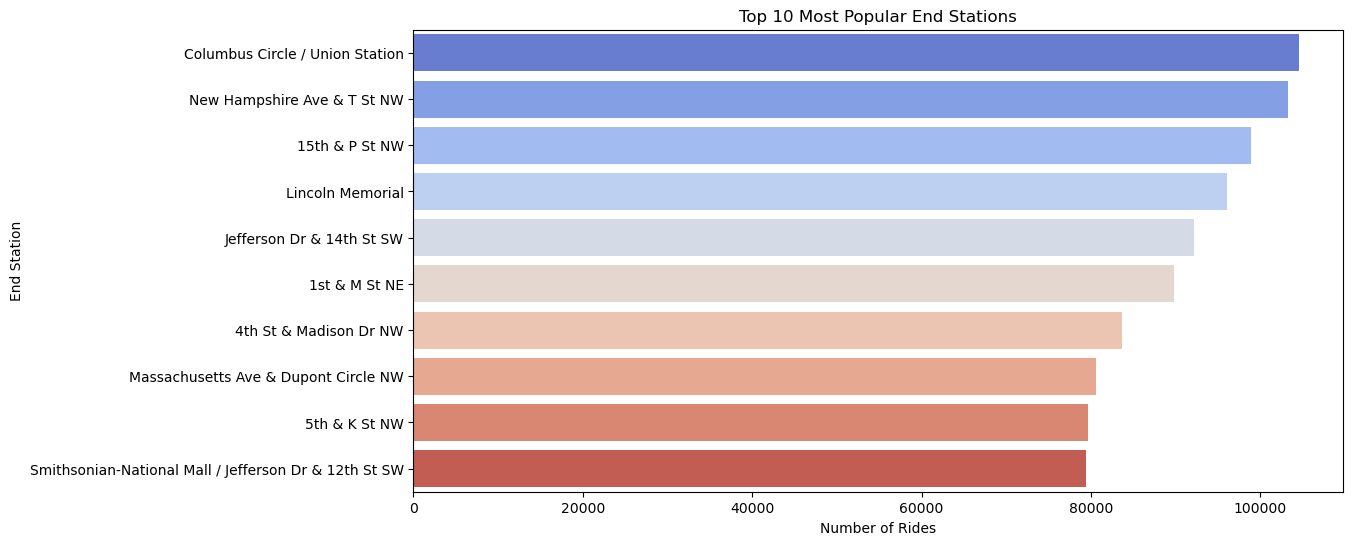

In [ ]:
# Top 10 meistgenutzte Stationen finden
top_start_stations = df["start_station_name"].value_counts().head(10)
top_end_stations = df["end_station_name"].value_counts().head(10)

# Visualisierung der Top-Stationen
plt.figure(figsize=(12,6))
sns.barplot(y=top_start_stations.index, x=top_start_stations.values, palette="coolwarm")
plt.xlabel("Number of Rides")
plt.ylabel("Start Station")
plt.title("Top 10 Most Popular Start Stations")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(y=top_end_stations.index, x=top_end_stations.values, palette="coolwarm")
plt.xlabel("Number of Rides")
plt.ylabel("End Station")
plt.title("Top 10 Most Popular End Stations")
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\944330762.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_unbalanced_stations["station_name"], x=top_unbalanced_stations["balance"], palette="coolwarm")


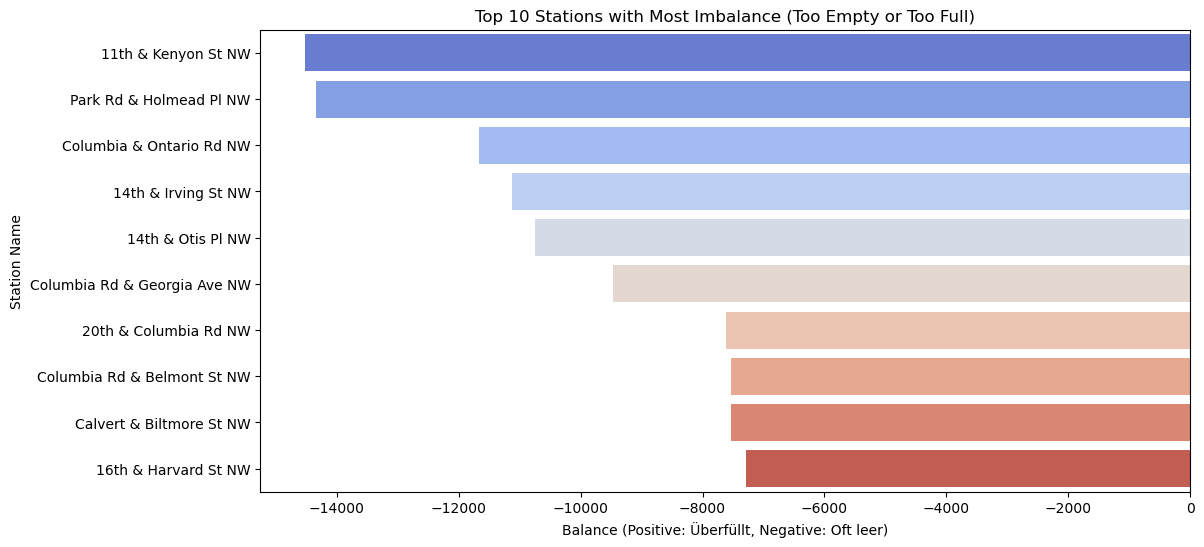

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregiere: Anzahl der Ausleihen & Rückgaben pro Station
station_usage = df.groupby("start_station_name")["ride_id"].count().reset_index()
station_usage.columns = ["station_name", "times_bikes_taken"]

station_returns = df.groupby("end_station_name")["ride_id"].count().reset_index()
station_returns.columns = ["station_name", "times_bikes_returned"]

# Zusammenführen der beiden Daten
station_balance = station_usage.merge(station_returns, on="station_name", how="outer").fillna(0)

# Berechnen, wie oft eine Station mehr ausgeliehen als zurückgegeben wurde (negative Werte = oft leer)
station_balance["balance"] = station_balance["times_bikes_returned"] - station_balance["times_bikes_taken"]

# Visualisierung der Stationen mit dem größten Ungleichgewicht (zu oft leer oder voll)
top_unbalanced_stations = station_balance.sort_values("balance", ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_unbalanced_stations["station_name"], x=top_unbalanced_stations["balance"], palette="coolwarm")
plt.xlabel("Balance (Positive: Überfüllt, Negative: Oft leer)")
plt.ylabel("Station Name")
plt.title("Top 10 Stations with Most Imbalance (Too Empty or Too Full)")
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\1306409707.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_empty_stations["station_name"], x=top_empty_stations["balance"], palette="Blues_r", ax=axes[0])
C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\1306409707.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_full_stations["station_name"], x=top_full_stations["balance"], palette="Reds", ax=axes[1])


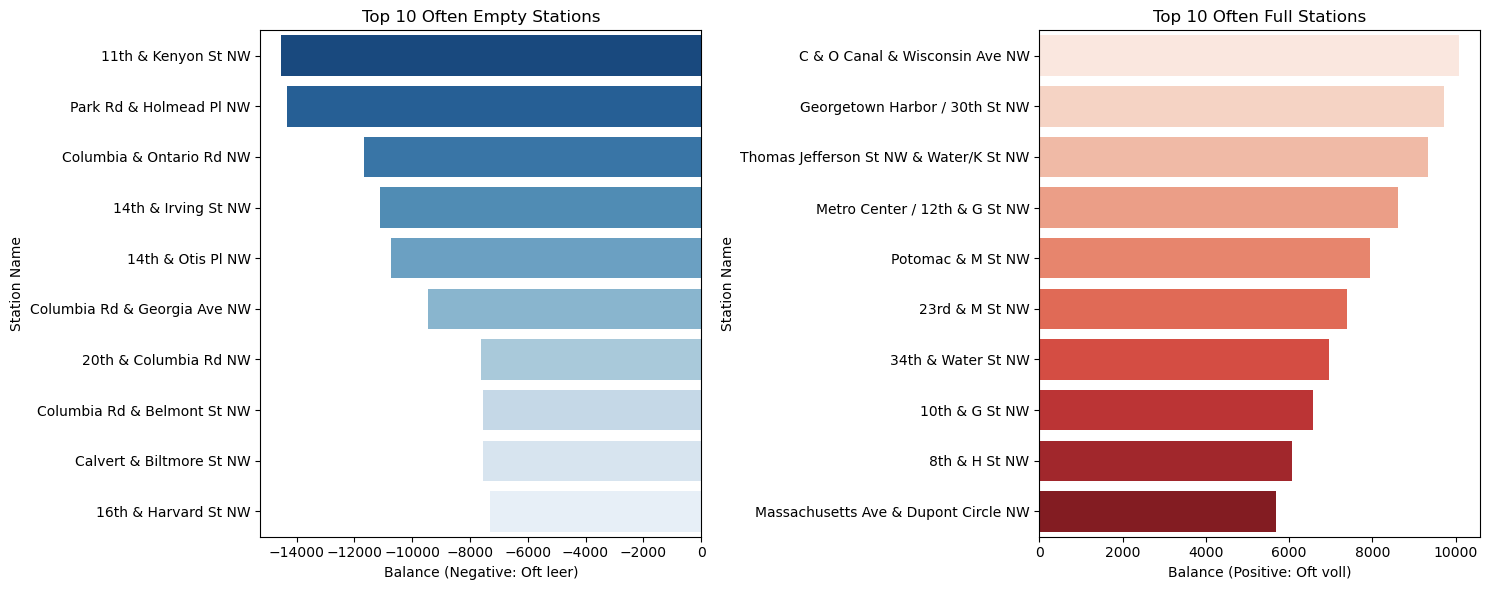

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregiere: Anzahl der Ausleihen & Rückgaben pro Station
station_usage = df.groupby("start_station_name")["ride_id"].count().reset_index()
station_usage.columns = ["station_name", "times_bikes_taken"]

station_returns = df.groupby("end_station_name")["ride_id"].count().reset_index()
station_returns.columns = ["station_name", "times_bikes_returned"]

# Zusammenführen der beiden Daten
station_balance = station_usage.merge(station_returns, on="station_name", how="outer").fillna(0)

# Berechnen, wie oft eine Station mehr ausgeliehen als zurückgegeben wurde
station_balance["balance"] = station_balance["times_bikes_returned"] - station_balance["times_bikes_taken"]

# Sortieren: 
# - Negative Werte = Oft leer
# - Positive Werte = Oft voll
top_empty_stations = station_balance.sort_values("balance", ascending=True).head(10)
top_full_stations = station_balance.sort_values("balance", ascending=False).head(10)

# Visualisierung in zwei Diagrammen
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 🚲 **Top 10 oft leere Stationen**
sns.barplot(y=top_empty_stations["station_name"], x=top_empty_stations["balance"], palette="Blues_r", ax=axes[0])
axes[0].set_xlabel("Balance (Negative: Oft leer)")
axes[0].set_ylabel("Station Name")
axes[0].set_title("Top 10 Often Empty Stations")

# 🚲 **Top 10 oft volle Stationen**
sns.barplot(y=top_full_stations["station_name"], x=top_full_stations["balance"], palette="Reds", ax=axes[1])
axes[1].set_xlabel("Balance (Positive: Oft voll)")
axes[1].set_ylabel("Station Name")
axes[1].set_title("Top 10 Often Full Stations")

plt.tight_layout()
plt.show()


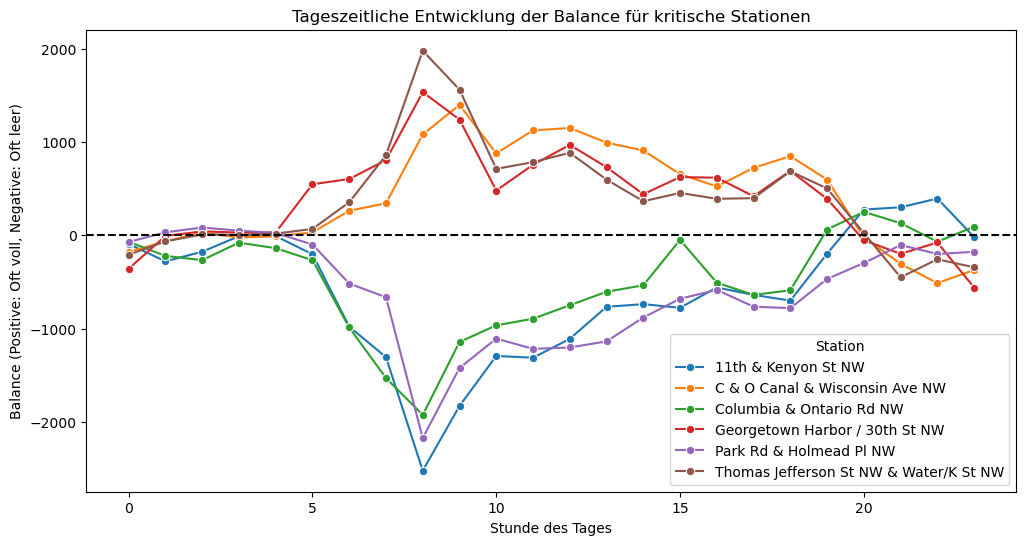

In [ ]:
# Erneutes Laden der Bibliotheken und der Datei nach dem Reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extrahiere die Stunden für Start- und Endzeiten
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

df["start_hour"] = df["started_at"].dt.hour
df["end_hour"] = df["ended_at"].dt.hour

# Aggregation: Anzahl der Abfahrten & Ankünfte pro Station und Stunde
station_hourly_usage = df.groupby(["start_station_name", "start_hour"]).size().reset_index(name="departures")
station_hourly_returns = df.groupby(["end_station_name", "end_hour"]).size().reset_index(name="arrivals")

# Umbenennung für Merge
station_hourly_usage.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
station_hourly_returns.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Zusammenführen von Abfahrten & Ankünften
station_hourly_balance = pd.merge(station_hourly_usage, station_hourly_returns, on=["station_name", "hour"], how="outer").fillna(0)

# Berechnung der Balance (positiv = voll, negativ = leer)
station_hourly_balance["balance"] = station_hourly_balance["arrivals"] - station_hourly_balance["departures"]

# Auswahl der Top 5 Stationen mit höchstem Ungleichgewicht
top_empty_stations = station_hourly_balance.groupby("station_name")["balance"].sum().nsmallest(3).index.tolist()
top_full_stations = station_hourly_balance.groupby("station_name")["balance"].sum().nlargest(3).index.tolist()

# Filtern nach den Top 3 leeren & vollen Stationen
filtered_data = station_hourly_balance[station_hourly_balance["station_name"].isin(top_empty_stations + top_full_stations)]

# Visualisierung der Balance über den Tagesverlauf für diese Stationen
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x="hour", y="balance", hue="station_name", marker="o")

# Labels & Titel
plt.axhline(0, color="black", linestyle="--")  # Null-Linie für Balance
plt.xlabel("Stunde des Tages")
plt.ylabel("Balance (Positive: Oft voll, Negative: Oft leer)")
plt.title("Tageszeitliche Entwicklung der Balance für kritische Stationen")

# Legende anzeigen
plt.legend(title="Station")

# Diagramm anzeigen
plt.show()


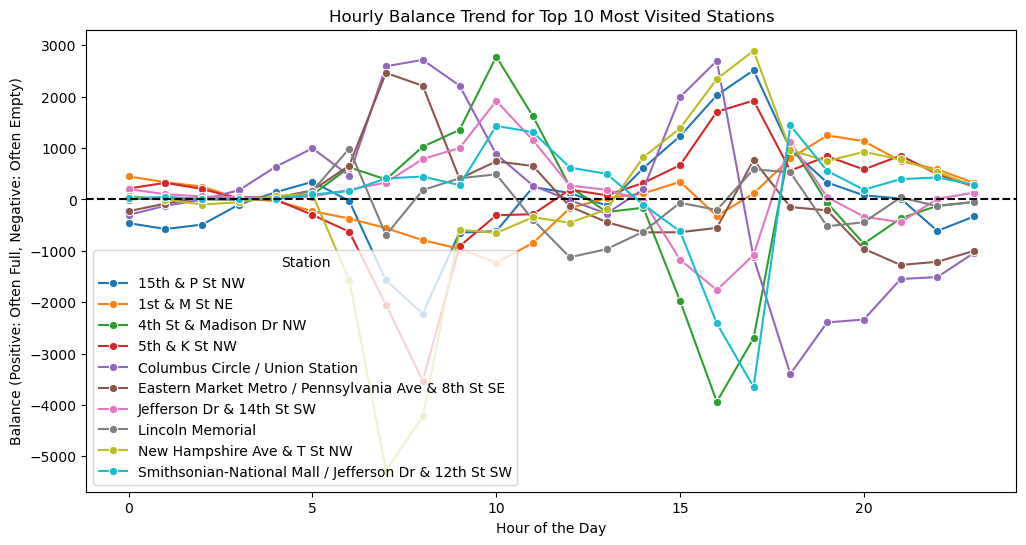

In [ ]:
# Erneutes Laden der Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extrahiere die Stunden für Start- und Endzeiten
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

df["start_hour"] = df["started_at"].dt.hour
df["end_hour"] = df["ended_at"].dt.hour

# Bestimme die **Top 10 am häufigsten besuchten Stationen** (Start & End kombiniert)
top_stations = pd.concat([df["start_station_name"], df["end_station_name"]]) \
                 .value_counts() \
                 .head(10).index.tolist()

# Aggregation: Anzahl der Abfahrten & Ankünfte pro Station und Stunde
station_hourly_usage = df.groupby(["start_station_name", "start_hour"]).size().reset_index(name="departures")
station_hourly_returns = df.groupby(["end_station_name", "end_hour"]).size().reset_index(name="arrivals")

# Umbenennung für Merge
station_hourly_usage.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
station_hourly_returns.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Zusammenführen von Abfahrten & Ankünften
station_hourly_balance = pd.merge(station_hourly_usage, station_hourly_returns, on=["station_name", "hour"], how="outer").fillna(0)

# Berechnung der Balance (positiv = voll, negativ = leer)
station_hourly_balance["balance"] = station_hourly_balance["arrivals"] - station_hourly_balance["departures"]

# Filtern nach den **Top 10 meistbesuchten Stationen**
filtered_data = station_hourly_balance[station_hourly_balance["station_name"].isin(top_stations)]

# Visualisierung der Balance über den Tagesverlauf für die Top 10 Stationen
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_data, x="hour", y="balance", hue="station_name", marker="o")

# Labels & Titel (Englisch)
plt.axhline(0, color="black", linestyle="--")  # Null-Linie für Balance
plt.xlabel("Hour of the Day")
plt.ylabel("Balance (Positive: Often Full, Negative: Often Empty)")
plt.title("Hourly Balance Trend for Top 10 Most Visited Stations")

# Legende anzeigen
plt.legend(title="Station")

# Diagramm anzeigen
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\199446068.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\199446068.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour


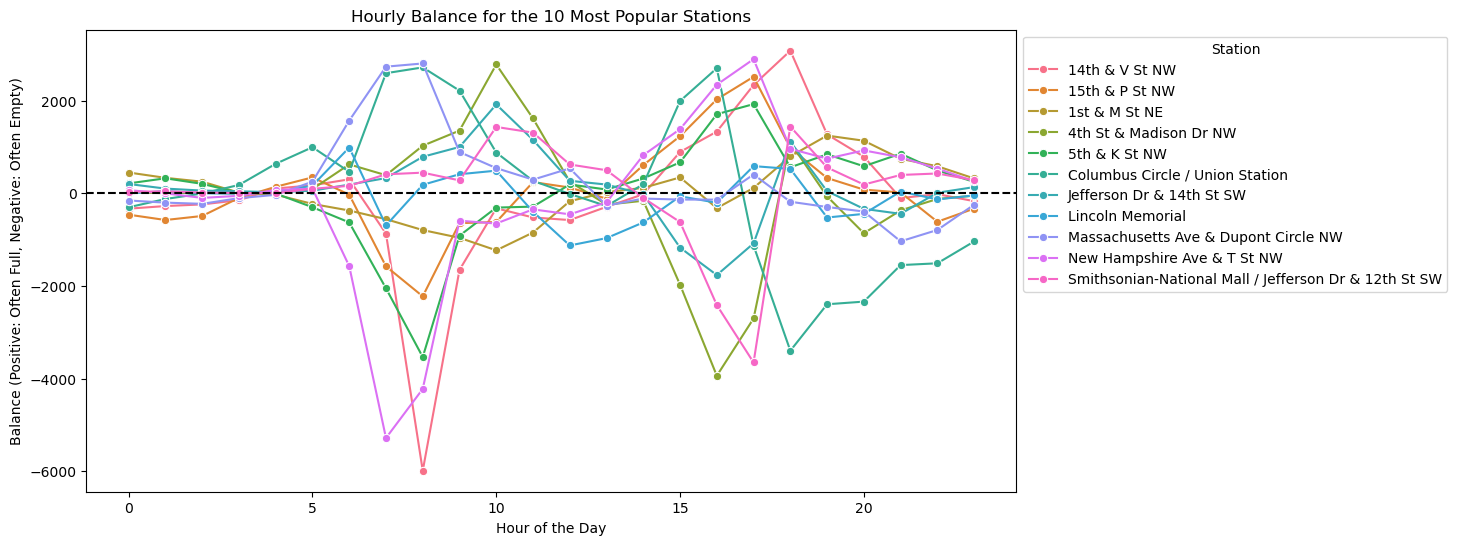

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Bestimme die 10 meistgenutzten Start- und Endstationen
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()
top_end_stations = df["end_station_name"].value_counts().head(10).index.tolist()

# Kombiniere Start- und Endstationen (ohne Duplikate)
top_stations = list(set(top_start_stations + top_end_stations))

# Extrahiere nur Fahrten mit diesen Stationen
df_filtered = df[(df["start_station_name"].isin(top_stations)) | (df["end_station_name"].isin(top_stations))]

# Berechne die Balance für jede Stunde
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour

# Gruppiere nach Stunde und Station
station_hourly_departures = df_filtered.groupby(["start_station_name", "start_hour"]).size().reset_index(name="departures")
station_hourly_returns = df_filtered.groupby(["end_station_name", "end_hour"]).size().reset_index(name="arrivals")

# Einheitliche Spaltennamen für Merge
station_hourly_departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
station_hourly_returns.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Zusammenführen von Ankünften und Abfahrten
station_hourly_balance = pd.merge(station_hourly_departures, station_hourly_returns, on=["station_name", "hour"], how="outer").fillna(0)

# Berechne die Balance (positive Werte = oft voll, negative Werte = oft leer)
station_hourly_balance["balance"] = station_hourly_balance["arrivals"] - station_hourly_balance["departures"]

# Filtere nur die 10 Top-Stationen für die Visualisierung
filtered_balance = station_hourly_balance[station_hourly_balance["station_name"].isin(top_stations)]

# Visualisierung der Balance pro Stunde für die 10 meistgenutzten Stationen
plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_balance, x="hour", y="balance", hue="station_name", marker="o")

# Labels & Titel
plt.axhline(0, color="black", linestyle="--")  # Null-Linie für Balance
plt.xlabel("Hour of the Day")
plt.ylabel("Balance (Positive: Often Full, Negative: Often Empty)")
plt.title("Hourly Balance for the 10 Most Popular Stations")

# Legende anzeigen
plt.legend(title="Station", bbox_to_anchor=(1,1))

# Diagramm anzeigen
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\3076204294.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
C:\Users\Tiba\AppData\Local\Temp\ipykernel_22520\3076204294.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour


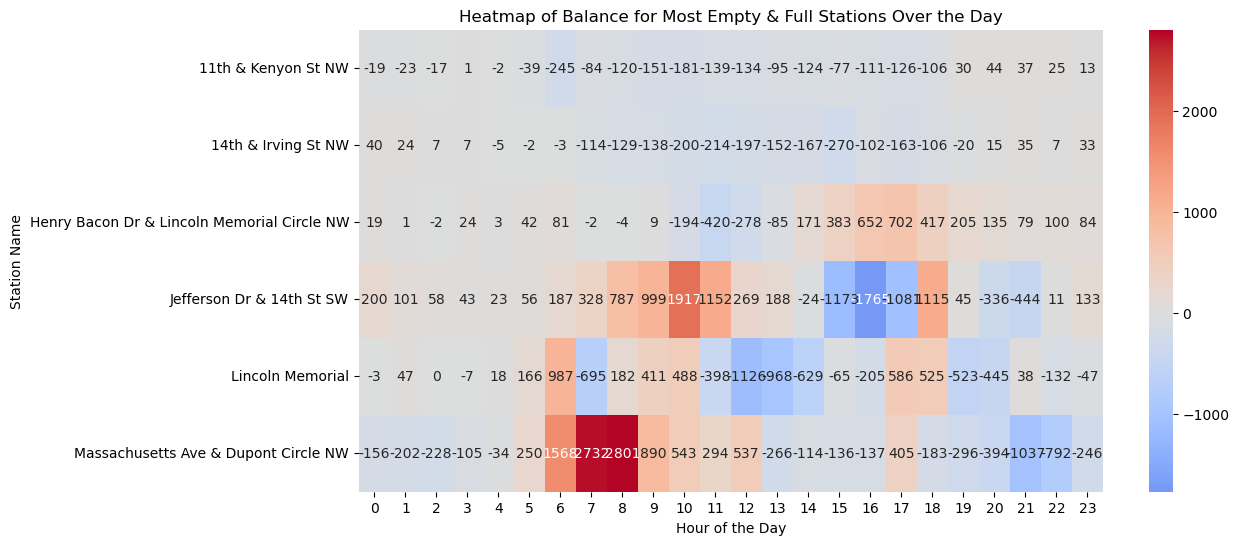

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 meistgenutzte Start- und Endstationen
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()
top_end_stations = df["end_station_name"].value_counts().head(10).index.tolist()

# Kombiniere Start- und Endstationen (ohne Duplikate)
top_stations = list(set(top_start_stations + top_end_stations))

# Nur Fahrten mit den meistgenutzten Stationen betrachten
df_filtered = df[(df["start_station_name"].isin(top_stations)) | (df["end_station_name"].isin(top_stations))]

# Stunden extrahieren
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour

# Berechne die Abfahrten & Ankünfte stündlich
departures = df_filtered.groupby(["start_station_name", "start_hour"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour"]).size().reset_index(name="arrivals")

# Einheitliche Spaltennamen für Merge
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Zusammenführen der Ankünfte und Abfahrten
station_hourly_balance = pd.merge(departures, arrivals, on=["station_name", "hour"], how="outer").fillna(0)

# Berechne Balance (positive = oft voll, negative = oft leer)
station_hourly_balance["balance"] = station_hourly_balance["arrivals"] - station_hourly_balance["departures"]

# Aggregation: Durchschnittliche Balance pro Stunde
hourly_avg_balance = station_hourly_balance.groupby(["station_name", "hour"])["balance"].mean().reset_index()

# Finde die 3 meist leeren & vollen Stationen
top_empty_stations = hourly_avg_balance.groupby("station_name")["balance"].sum().nsmallest(3).index.tolist()
top_full_stations = hourly_avg_balance.groupby("station_name")["balance"].sum().nlargest(3).index.tolist()

# Filtern der relevanten Stationen für Visualisierung
filtered_balance = hourly_avg_balance[hourly_avg_balance["station_name"].isin(top_empty_stations + top_full_stations)]

# **Heatmap erstellen für Balance über Tageszeit**
pivot_table = filtered_balance.pivot(index="station_name", columns="hour", values="balance")

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", center=0)

# Labels & Titel
plt.xlabel("Hour of the Day")
plt.ylabel("Station Name")
plt.title("Heatmap of Balance for Most Empty & Full Stations Over the Day")

# Diagramm anzeigen
plt.show()


In [ ]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [ ]:
# Re-load required libraries after execution state reset
import folium
from folium.plugins import HeatMapWithTime
import pandas as pd

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Extract hour from timestamp
df["start_hour"] = df["started_at"].dt.hour

# Determine the Top 10 most used start stations
top_start_stations = df["start_station_name"].value_counts().head(10).index

# Filter dataset for only these stations
df_top = df[df["start_station_name"].isin(top_start_stations)]

# Aggregate bike departures per station per hour
station_hourly_usage = df_top.groupby(["start_station_name", "start_lat", "start_lng", "start_hour"]).size().reset_index(name="departures")

# Normalize departures for better visibility on the heatmap
station_hourly_usage["departures"] = (station_hourly_usage["departures"] - station_hourly_usage["departures"].min()) / (station_hourly_usage["departures"].max() - station_hourly_usage["departures"].min())

# Prepare data for HeatMapWithTime
heat_data = []
for hour in sorted(station_hourly_usage["start_hour"].unique()):
    data = station_hourly_usage[station_hourly_usage["start_hour"] == hour][["start_lat", "start_lng", "departures"]].values.tolist()
    heat_data.append(data)

# Initialize folium map
m = folium.Map(location=[38.9072, -77.0369], zoom_start=13)

# Add HeatMapWithTime
HeatMapWithTime(heat_data, index=list(sorted(station_hourly_usage["start_hour"].unique())), radius=15, use_local_extrema=True).add_to(m)

# Save map
heatmap_file_path = "heatmap_top_10_stations_empty_over_time.html"
m.save(heatmap_file_path)

# Return file path
print(f"✅ Heatmap for Top 10 Stations created. Download here: sandbox:{heatmap_file_path}")


✅ Heatmap for Top 10 Stations created. Download here: sandbox:heatmap_top_10_stations_empty_over_time.html


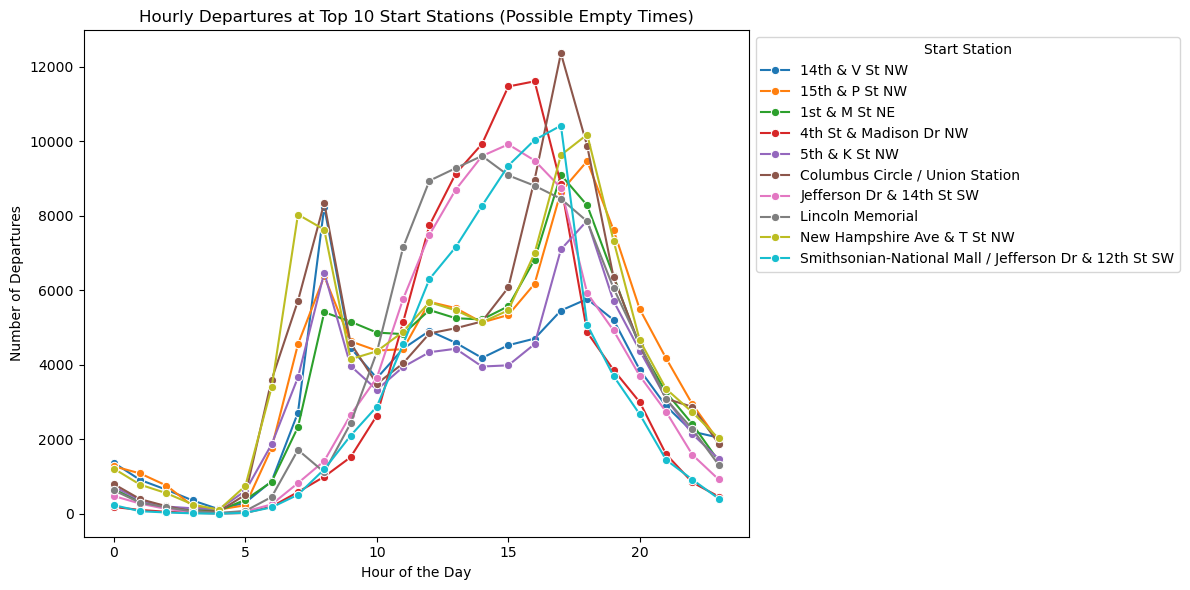

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Bestimme die 10 meistgenutzten Startstationen
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Filtere nur Fahrten mit diesen Startstationen
df_filtered = df[df["start_station_name"].isin(top_start_stations)].copy()

# Extrahiere die Stunde aus der Startzeit
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour

# Gruppiere nach Stunde und Station, zähle Abfahrten
station_hourly_departures = (
    df_filtered.groupby(["start_station_name", "start_hour"])
    .size()
    .reset_index(name="departures")
)

# 📈 Diagramm: Abfahrten pro Stunde je Startstation
plt.figure(figsize=(12,6))
sns.lineplot(
    data=station_hourly_departures,
    x="start_hour",
    y="departures",
    hue="start_station_name",
    marker="o"
)

# Achsen & Titel
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Departures")
plt.title("Hourly Departures at Top 10 Start Stations (Possible Empty Times)")
plt.legend(title="Start Station", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


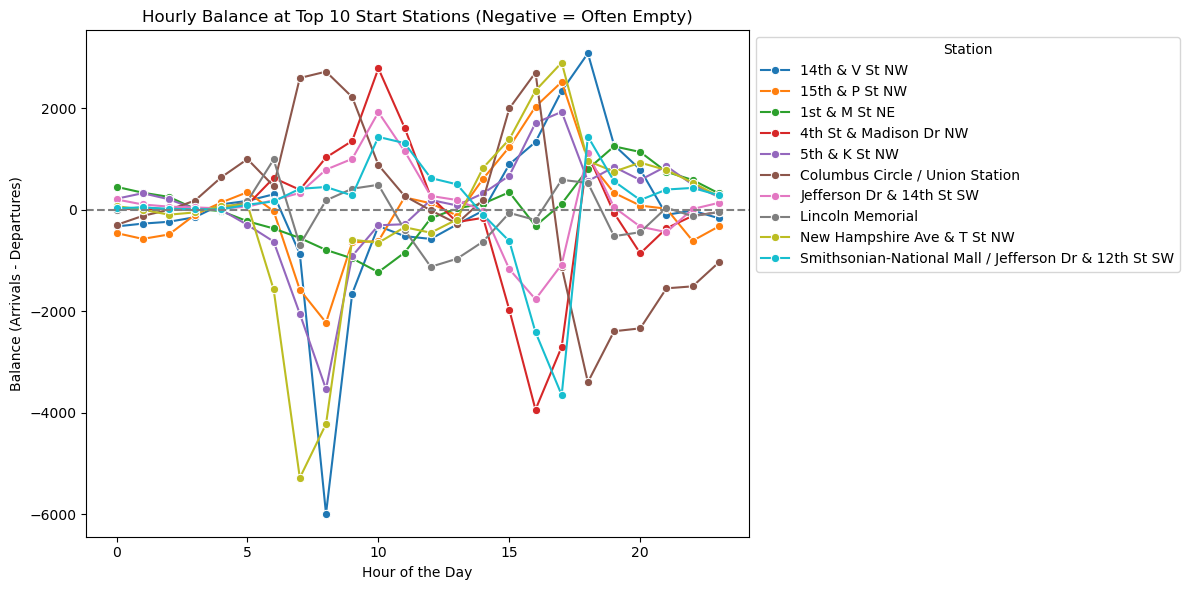

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 Startstationen
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Nur Fahrten mit diesen Stationen als Start oder Ziel
df_filtered = df[(df["start_station_name"].isin(top_start_stations)) | (df["end_station_name"].isin(top_start_stations))].copy()

# Stunden extrahieren
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour

# Gruppiere: Abfahrten und Ankünfte
departures = df_filtered.groupby(["start_station_name", "start_hour"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour"]).size().reset_index(name="arrivals")

# Einheitliche Spaltennamen
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Mergen
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour"], how="outer").fillna(0)

# Balance berechnen
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Nur Top-Startstationen filtern
balance_df = balance_df[balance_df["station_name"].isin(top_start_stations)]

# 📈 Visualisieren
plt.figure(figsize=(12,6))
sns.lineplot(data=balance_df, x="hour", y="balance", hue="station_name", marker="o")

# Null-Linie
plt.axhline(0, color="gray", linestyle="--")

# Beschriftung
plt.xlabel("Hour of the Day")
plt.ylabel("Balance (Arrivals - Departures)")
plt.title("Hourly Balance at Top 10 Start Stations (Negative = Often Empty)")
plt.legend(title="Station", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


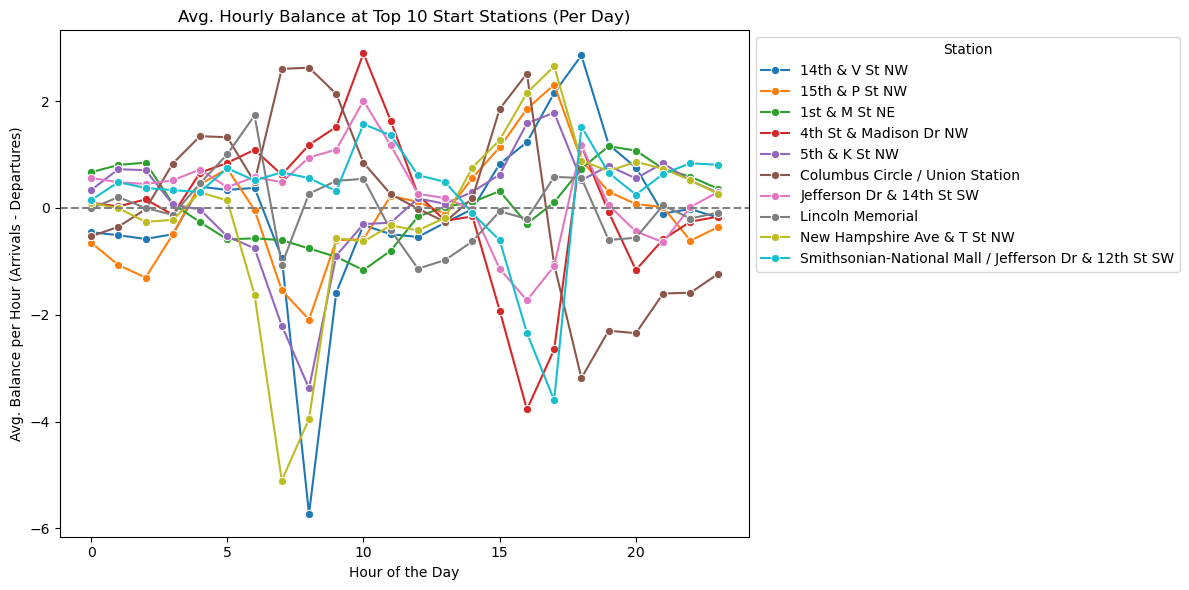

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 stations
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Filter only those stations
df_filtered = df[
    (df["start_station_name"].isin(top_start_stations)) |
    (df["end_station_name"].isin(top_start_stations))
].copy()

# Add hour and date
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour
df_filtered["date"] = df_filtered["started_at"].dt.date  # for daily aggregation

# Count departures and arrivals PER DAY
departures = df_filtered.groupby(["start_station_name", "start_hour", "date"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "date"]).size().reset_index(name="arrivals")

# Rename
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge and fill
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "date"], how="outer").fillna(0)

# Balance = arrivals - departures
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filter only top stations again
balance_df = balance_df[balance_df["station_name"].isin(top_start_stations)]

# ➕ NOW: Average per hour per station (across all dates)
avg_balance_df = balance_df.groupby(["station_name", "hour"])["balance"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_balance_df, x="hour", y="balance", hue="station_name", marker="o")

plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg. Balance per Hour (Arrivals - Departures)")
plt.title("Avg. Hourly Balance at Top 10 Start Stations (Per Day)")
plt.legend(title="Station", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


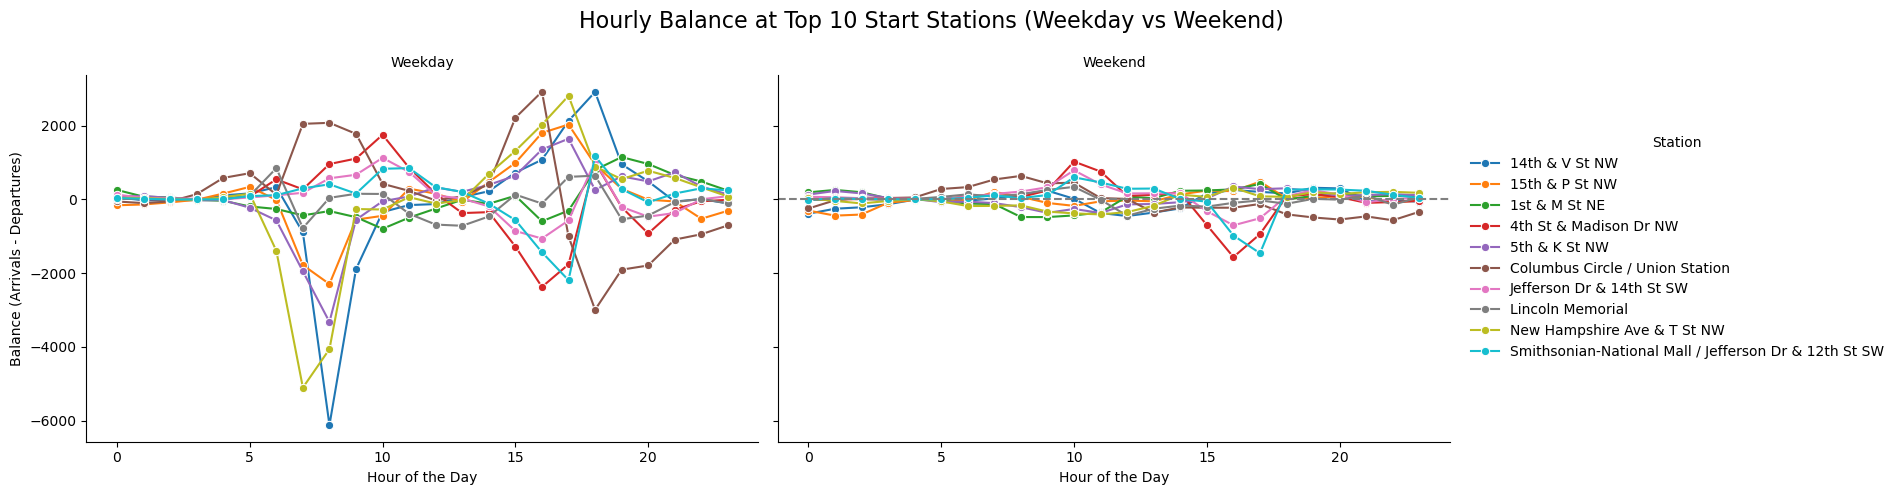

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datumsspalten parsen
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 Startstationen
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Filter für relevante Fahrten
df_filtered = df[(df["start_station_name"].isin(top_start_stations)) | (df["end_station_name"].isin(top_start_stations))].copy()

# Extrahiere Stunde und Wochentyp
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour

# Wochentag ermitteln
df_filtered["weekday"] = df_filtered["started_at"].dt.weekday  # 0=Mo, ..., 6=So
df_filtered["day_type"] = df_filtered["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Gruppiere: Abfahrten & Ankünfte pro Stunde, Station & Wochentyp
departures = df_filtered.groupby(["start_station_name", "start_hour", "day_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "day_type"]).size().reset_index(name="arrivals")

# Einheitliche Spaltennamen für Merge
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge: Abfahrten und Ankünfte kombinieren
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "day_type"], how="outer").fillna(0)

# Balance berechnen
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Nur Top-Startstationen für Visualisierung
balance_df = balance_df[balance_df["station_name"].isin(top_start_stations)]

# 📊 Visualisierung
g = sns.FacetGrid(balance_df, col="day_type", height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="hour", y="balance", hue="station_name", marker="o")
g.add_legend(title="Station")
g.set_axis_labels("Hour of the Day", "Balance (Arrivals - Departures)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Hourly Balance at Top 10 Start Stations (Weekday vs Weekend)", fontsize=16)
plt.axhline(0, color="gray", linestyle="--")
plt.show()


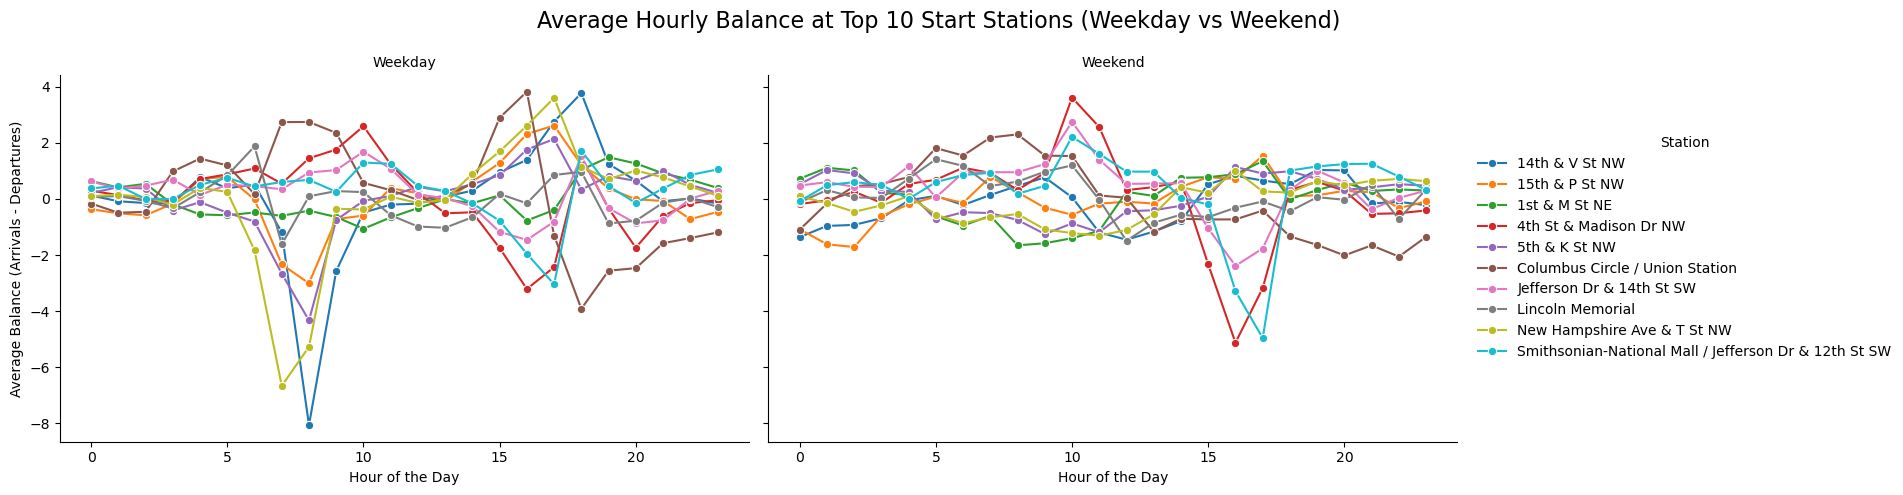

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Parse datetime columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 start stations
top_start_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Filter for relevant trips
df_filtered = df[
    (df["start_station_name"].isin(top_start_stations)) |
    (df["end_station_name"].isin(top_start_stations))
].copy()

# Extract hour and day type
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour
df_filtered["weekday"] = df_filtered["started_at"].dt.weekday
df_filtered["day_type"] = df_filtered["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Group by station, hour, day_type and date to count departures and arrivals
df_filtered["date"] = df_filtered["started_at"].dt.date
departures = df_filtered.groupby(["start_station_name", "start_hour", "day_type", "date"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "day_type", "date"]).size().reset_index(name="arrivals")

# Standardize column names
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge and calculate balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "day_type", "date"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Only keep top stations
balance_df = balance_df[balance_df["station_name"].isin(top_start_stations)]

# Calculate average balance across dates
avg_balance_df = balance_df.groupby(["station_name", "hour", "day_type"])["balance"].mean().reset_index()

# Plot average hourly balance
g = sns.FacetGrid(avg_balance_df, col="day_type", height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="hour", y="balance", hue="station_name", marker="o")
g.add_legend(title="Station")
g.set_axis_labels("Hour of the Day", "Average Balance (Arrivals - Departures)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Average Hourly Balance at Top 10 Start Stations (Weekday vs Weekend)", fontsize=16)
plt.show()


In [ ]:
import pandas as pd

# Reload the required data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert datetime and extract necessary columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df["week_type"] = df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Top 10 fixed stations
top_stations = [
    "14th & V St NW", "15th & P St NW", "1st & M St NE", "4th St & Madison Dr NW",
    "5th & K St NW", "Columbus Circle / Union Station", "Jefferson Dr & 14th St SW",
    "Lincoln Memorial", "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter relevant trips
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Group by station, date, and week_type
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

# Normalize column names
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge and calculate balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filter again to include only selected top stations
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Calculate average balance per station for weekday and weekend
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

print



                                         station_name week_type  \
0                                      14th & V St NW   Weekday   
1                                      14th & V St NW   Weekend   
2                                      15th & P St NW   Weekday   
3                                      15th & P St NW   Weekend   
4                                       1st & M St NE   Weekday   
5                                       1st & M St NE   Weekend   
6                              4th St & Madison Dr NW   Weekday   
7                              4th St & Madison Dr NW   Weekend   
8                                       5th & K St NW   Weekday   
9                                       5th & K St NW   Weekend   
10                    Columbus Circle / Union Station   Weekday   
11                    Columbus Circle / Union Station   Weekend   
12                          Jefferson Dr & 14th St SW   Weekday   
13                          Jefferson Dr & 14th St SW   Weeken

In [ ]:
import folium
from folium import plugins

# Stationen mit morgendlichen Problemen (Rush Hour am Morgen)
morning_problem_stations = [
    {"name": "14th & V St NW", "lat": 38.918054, "lng": -77.032095},
    {"name": "15th & P St NW", "lat": 38.909611, "lng": -77.0336},
    {"name": "New Hampshire Ave & T St NW", "lat": 38.91789, "lng": -77.03858},
    {"name": "Smithsonian-National Mall / Jefferson Dr & 12th St SW", "lat": 38.8882, "lng": -77.0281}
]

# Stationen mit nachmittäglichen Problemen (Rush Hour am Nachmittag)
evening_problem_stations = [
    {"name": "4th St & Madison Dr NW", "lat": 38.8913, "lng": -77.0174},
    {"name": "5th & K St NW", "lat": 38.90298, "lng": -77.0199},
    {"name": "Columbus Circle / Union Station", "lat": 38.897222, "lng": -77.006111}
]

# Initialisiere Karte
m = folium.Map(location=[38.9072, -77.0369], zoom_start=13)

# Marker für Morgenstationen (Blau)
for station in morning_problem_stations:
    folium.CircleMarker(
        location=[station["lat"], station["lng"]],
        radius=8,
        color="blue",
        fill=True,
        fill_opacity=0.7,
        popup=station["name"]
    ).add_to(m)

# Marker für Abendstationen (Rot)
for station in evening_problem_stations:
    folium.CircleMarker(
        location=[station["lat"], station["lng"]],
        radius=8,
        color="red",
        fill=True,
        fill_opacity=0.7,
        popup=station["name"]
    ).add_to(m)

# Legende hinzufügen (HTML)
legend_html = """
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 300px; height: 80px; 
    background-color: white; 
    border:2px solid grey; 
    z-index:9999; 
    font-size:14px;
    padding: 10px;
">
    <b>Legend</b><br>
    <i style="background:blue;color:blue;border-radius:50%;padding:5px;">&nbsp;</i> Often high departures in the morning<br>
    <i style="background:red;color:red;border-radius:50%;padding:5px;">&nbsp;</i> Often high departures in the afternoon
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

# Speichern
m.save("problem_stations_map_with_legend.html")


In [ ]:
# Re-import required libraries due to kernel reset
import pandas as pd

# Load trip and station data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert datetime columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Define top 10 stations manually
top_start_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter for relevant stations
df_filtered = df[
    (df["start_station_name"].isin(top_start_stations)) |
    (df["end_station_name"].isin(top_start_stations))
].copy()

# Extract time info
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour
df_filtered["date"] = df_filtered["started_at"].dt.date

# Group departures and arrivals
departures = df_filtered.groupby(["start_station_name", "start_hour", "date"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "date"]).size().reset_index(name="arrivals")

# Standardize for merging
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge and calculate hourly balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "date"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]
balance_df = balance_df[balance_df["station_name"].isin(top_start_stations)]

# Average hourly balance
avg_balance_df = balance_df.groupby(["station_name", "hour"])["balance"].mean().reset_index()

# Sum average balances per station (estimated end-of-day balance)
end_of_day_balance = avg_balance_df.groupby("station_name")["balance"].sum().reset_index()
end_of_day_balance.rename(columns={"balance": "estimated_end_of_day_balance"}, inplace=True)

# Merge with capacity
station_capacity = stations_df[["NAME", "CAPACITY"]]
end_of_day_balance = pd.merge(end_of_day_balance, station_capacity, left_on="station_name", right_on="NAME", how="left")

# Evaluate status based on net balance
end_of_day_balance["status"] = end_of_day_balance["estimated_end_of_day_balance"].apply(
    lambda x: "Overflow" if x > 0 else "Deficit" if x < 0 else "Balanced"
)

print(end_of_day_balance[["station_name", "estimated_end_of_day_balance", "CAPACITY", "status"]])


                                        station_name  \
0                                     14th & V St NW   
1                                     15th & P St NW   
2                                      1st & M St NE   
3                             4th St & Madison Dr NW   
4                                      5th & K St NW   
5                    Columbus Circle / Union Station   
6                          Jefferson Dr & 14th St SW   
7                                   Lincoln Memorial   
8                        New Hampshire Ave & T St NW   
9  Smithsonian-National Mall / Jefferson Dr & 12t...   

   estimated_end_of_day_balance  CAPACITY    status  
0                     -2.098928        31   Deficit  
1                     -0.780407        19   Deficit  
2                      1.495710        15  Overflow  
3                      1.031499        31  Overflow  
4                      1.517788        23  Overflow  
5                      2.518215        55  Overflow  
6    

In [ ]:
import pandas as pd

# Load the required trip and station data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Define top 10 stations
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter for top stations
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Extract time details
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour
df_filtered["date"] = df_filtered["started_at"].dt.date

# Group departures and arrivals
departures = df_filtered.groupby(["start_station_name", "start_hour", "date"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "date"]).size().reset_index(name="arrivals")

departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge and calculate hourly balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "date"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Average balance per station and hour
avg_balance_df = balance_df.groupby(["station_name", "hour"])["balance"].mean().reset_index()

# Calculate morning and evening balance separately
morning = avg_balance_df[avg_balance_df["hour"] < 12].groupby("station_name")["balance"].sum().reset_index()
evening = avg_balance_df[avg_balance_df["hour"] >= 12].groupby("station_name")["balance"].sum().reset_index()

# Rename columns
morning.rename(columns={"balance": "morning_balance"}, inplace=True)
evening.rename(columns={"balance": "evening_balance"}, inplace=True)

# Merge both into one summary
combined_balance = pd.merge(morning, evening, on="station_name")

# Add capacity and check status
station_capacity = stations_df[["NAME", "CAPACITY"]]
combined_balance = pd.merge(combined_balance, station_capacity, left_on="station_name", right_on="NAME", how="left")

# Status morning
combined_balance["morning_status"] = combined_balance["morning_balance"].apply(
    lambda x: "Overflow" if x > 0 else "Deficit" if x < 0 else "Balanced"
)

# Status evening
combined_balance["evening_status"] = combined_balance["evening_balance"].apply(
    lambda x: "Overflow" if x > 0 else "Deficit" if x < 0 else "Balanced"
)

print(combined_balance[["station_name", "morning_balance", "evening_balance", "CAPACITY", "morning_status", "evening_status"]])


                                        station_name  morning_balance  \
0                                     14th & V St NW        -9.969005   
1                                     15th & P St NW        -6.967254   
2                                      1st & M St NE        -3.257660   
3                             4th St & Madison Dr NW        10.604243   
4                                      5th & K St NW        -6.531255   
5                    Columbus Circle / Union Station        11.551734   
6                          Jefferson Dr & 14th St SW         9.397009   
7                                   Lincoln Memorial         3.111501   
8                        New Hampshire Ave & T St NW       -12.154209   
9  Smithsonian-National Mall / Jefferson Dr & 12t...         7.369874   

   evening_balance  CAPACITY morning_status evening_status  
0         7.870077        31        Deficit       Overflow  
1         6.186847        19        Deficit       Overflow  
2         4.7

In [ ]:
import pandas as pd

# Load trip data and station capacity data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert time columns to datetime
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# Top 10 stations by usage
top_stations = df["start_station_name"].value_counts().head(10).index.tolist()

# Filter only trips starting or ending at those stations
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Add date and hour columns
df_filtered["start_hour"] = df_filtered["started_at"].dt.hour
df_filtered["end_hour"] = df_filtered["ended_at"].dt.hour
df_filtered["date"] = df_filtered["started_at"].dt.date

# Group by day and hour to count departures and arrivals
departures = df_filtered.groupby(["start_station_name", "start_hour", "date"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "end_hour", "date"]).size().reset_index(name="arrivals")

# Rename columns for merging
departures.rename(columns={"start_station_name": "station_name", "start_hour": "hour"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name", "end_hour": "hour"}, inplace=True)

# Merge departures and arrivals
balance_df = pd.merge(departures, arrivals, on=["station_name", "hour", "date"], how="outer").fillna(0)

# Calculate balance
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filter again for top stations
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Total daily balance per station
daily_balance = balance_df.groupby(["station_name", "date"])["balance"].sum().reset_index()

# Merge with capacity info
capacity_info = stations_df[["NAME", "CAPACITY"]]
result = pd.merge(daily_balance, capacity_info, left_on="station_name", right_on="NAME", how="left")

# Compare total balance with capacity (absolute value)
result["is_balanced"] = result["balance"].abs() <= result["CAPACITY"]

# Show summary per station: average daily balance and how often it stayed within capacity
summary = result.groupby("station_name").agg(
    avg_daily_balance=("balance", "mean"),
    capacity=("CAPACITY", "first"),
    percent_balanced=("is_balanced", "mean")
).reset_index()

# Convert percent to readable %
summary["percent_balanced"] = (summary["percent_balanced"] * 100).round(1)

print(summary)


                                        station_name  avg_daily_balance  \
0                                     14th & V St NW          -1.158904   
1                                     15th & P St NW           0.768950   
2                                      1st & M St NE           0.869287   
3                             4th St & Madison Dr NW          -1.123959   
4                                      5th & K St NW           1.082342   
5                    Columbus Circle / Union Station           1.604052   
6                          Jefferson Dr & 14th St SW           2.561065   
7                                   Lincoln Memorial          -1.654378   
8                        New Hampshire Ave & T St NW          -1.455708   
9  Smithsonian-National Mall / Jefferson Dr & 12t...           1.700461   

   capacity  percent_balanced  
0        31              99.6  
1        19              99.8  
2        15              99.5  
3        31              99.7  
4        23   

In [ ]:
import pandas as pd

# Reload trip and station data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Time columns and weekday/weekend info
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df["week_type"] = df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Top 10 predefined stations
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter only rows involving these stations
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Daily departures and arrivals
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

# Normalize column names
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge and calculate balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# ✅ Filter again to keep only desired top stations
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Calculate average balance
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Merge with station capacity
avg_balance = pd.merge(avg_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Simulation function
def simulate_days_until_problem(start_bikes, daily_change, capacity):
    bikes = start_bikes
    for day in range(1, 1001):
        bikes += daily_change
        if bikes <= 0 or bikes >= capacity:
            return day
    return ">1000"

# Run simulation
avg_balance["start_bikes"] = avg_balance["CAPACITY"]
avg_balance["days_until_problem"] = avg_balance.apply(
    lambda row: simulate_days_until_problem(row["start_bikes"], row["avg_daily_balance"], row["CAPACITY"]),
    axis=1
)

# Final table
result = avg_balance[["station_name", "week_type", "avg_daily_balance", "CAPACITY", "days_until_problem"]]

print(result)

                                         station_name week_type  \
0                                      14th & V St NW   Weekday   
1                                      14th & V St NW   Weekend   
2                                      15th & P St NW   Weekday   
3                                      15th & P St NW   Weekend   
4                                       1st & M St NE   Weekday   
5                                       1st & M St NE   Weekend   
6                              4th St & Madison Dr NW   Weekday   
7                              4th St & Madison Dr NW   Weekend   
8                                       5th & K St NW   Weekday   
9                                       5th & K St NW   Weekend   
10                    Columbus Circle / Union Station   Weekday   
11                    Columbus Circle / Union Station   Weekend   
12                          Jefferson Dr & 14th St SW   Weekday   
13                          Jefferson Dr & 14th St SW   Weeken

In [ ]:
import pandas as pd

# Load corrected trip and station data
station_file_path = "Capital_Bikeshare_Locations.csv"

stations_df = pd.read_csv(station_file_path)

# Convert datetime columns
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Define fixed top stations
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter for relevant trips
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Group departures and arrivals
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge for balance calculation
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filter for correct station list again
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Average daily balance by week type
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Merge with capacity
avg_balance = pd.merge(avg_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Calculate average weekly balance (5 weekdays + 2 weekends)
weekly_balance = avg_balance.pivot(index="station_name", columns="week_type", values="avg_daily_balance").reset_index()
weekly_balance = pd.merge(weekly_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

weekly_balance["weekly_balance"] = weekly_balance["Weekday"] * 5 + weekly_balance["Weekend"] * 2

# Simulation: start at full capacity and simulate weeks
def simulate_weeks(start_bikes, weekly_change, capacity):
    bikes = start_bikes
    for week in range(1, 1001):
        bikes += weekly_change
        if bikes <= 0 or bikes >= capacity:
            return week
    return ">1000"

weekly_balance["start_bikes"] = weekly_balance["CAPACITY"]
weekly_balance["weeks_until_problem"] = weekly_balance.apply(
    lambda row: simulate_weeks(row["start_bikes"], row["weekly_balance"], row["CAPACITY"]),
    axis=1
)

final_result = weekly_balance[["station_name", "Weekday", "Weekend", "weekly_balance", "CAPACITY", "weeks_until_problem"]]
print(final_result)

                                        station_name   Weekday   Weekend  \
0                                     14th & V St NW -0.660691 -2.398089   
1                                     15th & P St NW  1.344430 -0.662420   
2                                      1st & M St NE  0.632051  1.458599   
3                             4th St & Madison Dr NW -1.040155 -1.333333   
4                                      5th & K St NW  0.948718  1.415335   
5                    Columbus Circle / Union Station  3.988372 -4.310897   
6                          Jefferson Dr & 14th St SW  1.552699  5.083601   
7                                   Lincoln Memorial -2.043984 -0.689103   
8                        New Hampshire Ave & T St NW -1.049936 -2.464968   
9  Smithsonian-National Mall / Jefferson Dr & 12t...  1.457364  2.305466   

   weekly_balance  CAPACITY  weeks_until_problem  
0       -8.099635        31                    4  
1        5.397310        19                    1  
2        6

In [ ]:
import pandas as pd

# Dateipfade
station_file_path = "Capital_Bikeshare_Locations.csv"

# Laden der Daten
stations_df = pd.read_csv(station_file_path)

# Konvertieren der Datums- und Zeitspalten
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Definieren der Top-Stationen
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filtern der relevanten Fahrten
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Gruppieren der Abfahrten und Ankünfte
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

# Umbenennen der Spalten für Konsistenz
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Zusammenführen der Abfahrten und Ankünfte
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filtern der Stationen erneut, um nur die Top-Stationen zu behalten
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Durchschnittliche tägliche Balance nach Wochentyp berechnen
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Zusammenführen mit Kapazitätsdaten
avg_balance = pd.merge(avg_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Wöchentliche Balance berechnen (5 Wochentage + 2 Wochenendtage)
weekly_balance = avg_balance.pivot(index="station_name", columns="week_type", values="avg_daily_balance").reset_index()
weekly_balance = pd.merge(weekly_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

weekly_balance["Weekday"] = weekly_balance["Weekday"].fillna(0)
weekly_balance["Weekend"] = weekly_balance["Weekend"].fillna(0)
weekly_balance["weekly_balance"] = weekly_balance["Weekday"] * 5 + weekly_balance["Weekend"] * 2

# Simulation: Start mit voller Kapazität und Wochen simulieren
def simulate_weeks(start_bikes, weekly_change, capacity):
    bikes = start_bikes
    for week in range(1, 1001):
        bikes += weekly_change
        if bikes <= 0 or bikes >= capacity:
            return week
    return ">1000"

weekly_balance["start_bikes"] = weekly_balance["CAPACITY"]
weekly_balance["weeks_until_problem"] = weekly_balance.apply(
    lambda row: simulate_weeks(row["start_bikes"], row["weekly_balance"], row["CAPACITY"]),
    axis=1
)

# Endgültiges Ergebnis
final_result = weekly_balance[["station_name", "Weekday", "Weekend", "weekly_balance", "CAPACITY", "weeks_until_problem"]]
print(final_result)

                                        station_name   Weekday   Weekend  \
0                                     14th & V St NW -0.660691 -2.398089   
1                                     15th & P St NW  1.344430 -0.662420   
2                                      1st & M St NE  0.632051  1.458599   
3                             4th St & Madison Dr NW -1.040155 -1.333333   
4                                      5th & K St NW  0.948718  1.415335   
5                    Columbus Circle / Union Station  3.988372 -4.310897   
6                          Jefferson Dr & 14th St SW  1.552699  5.083601   
7                                   Lincoln Memorial -2.043984 -0.689103   
8                        New Hampshire Ave & T St NW -1.049936 -2.464968   
9  Smithsonian-National Mall / Jefferson Dr & 12t...  1.457364  2.305466   

   weekly_balance  CAPACITY  weeks_until_problem  
0       -8.099635        31                    4  
1        5.397310        19                    1  
2        6

In [ ]:
print(balance_df["week_type"].value_counts())

week_type
Weekday    7774
Weekend    3124
Name: count, dtype: int64


In [ ]:
# Durchschnittliche Balance für Weekday und Weekend
weekday_balance = balance_df[balance_df["week_type"] == "Weekday"]["balance"].mean()
weekend_balance = balance_df[balance_df["week_type"] == "Weekend"]["balance"].mean()

print(f"Durchschnittliche Balance an Wochentagen: {weekday_balance}")
print(f"Durchschnittliche Balance an Wochenenden: {weekend_balance}")

Durchschnittliche Balance an Wochentagen: 0.5128633907898122
Durchschnittliche Balance an Wochenenden: -0.16261203585147246


In [ ]:
# Anzahl der Datenpunkte für Weekday und Weekend
weekday_count = balance_df[balance_df["week_type"] == "Weekday"].shape[0]
weekend_count = balance_df[balance_df["week_type"] == "Weekend"].shape[0]

print(f"Anzahl der Datenpunkte an Wochentagen: {weekday_count}")
print(f"Anzahl der Datenpunkte an Wochenenden: {weekend_count}")

Anzahl der Datenpunkte an Wochentagen: 7774
Anzahl der Datenpunkte an Wochenenden: 3124


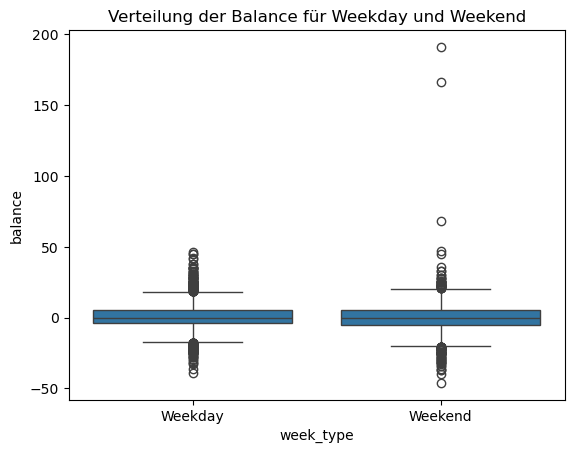

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=balance_df, x="week_type", y="balance")
plt.title("Verteilung der Balance für Weekday und Weekend")
plt.show()

In [ ]:
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

In [ ]:
# Entfernen von Outliers basierend auf der IQR-Methode
Q1 = balance_df["balance"].quantile(0.25)
Q3 = balance_df["balance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

balance_df = balance_df[(balance_df["balance"] >= lower_bound) & (balance_df["balance"] <= upper_bound)]
print(f"Anzahl der verbleibenden Datenpunkte nach dem Entfernen von Outliers: {balance_df.shape[0]}")


Anzahl der verbleibenden Datenpunkte nach dem Entfernen von Outliers: 10434


  week_type   balance
0   Weekday  0.402885
1   Weekend  0.104138


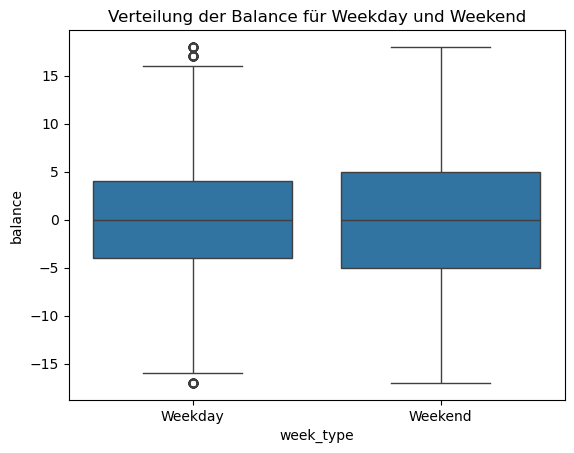

Anzahl der Datenpunkte an Wochentagen: 7486
Anzahl der Datenpunkte an Wochenenden: 2948


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Berechnung der Balance
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Durchschnittliche Balance nach Weekday und Weekend
avg_balance = balance_df.groupby("week_type")["balance"].mean().reset_index()
print(avg_balance)

# Visualisierung der Balance
sns.boxplot(data=balance_df, x="week_type", y="balance")
plt.title("Verteilung der Balance für Weekday und Weekend")
plt.show()

# Überprüfen der Datenmengen
weekday_count = balance_df[balance_df["week_type"] == "Weekday"].shape[0]
weekend_count = balance_df[balance_df["week_type"] == "Weekend"].shape[0]

print(f"Anzahl der Datenpunkte an Wochentagen: {weekday_count}")
print(f"Anzahl der Datenpunkte an Wochenenden: {weekend_count}")

In [ ]:
#best 
import pandas as pd

# Dateipfade
station_file_path = "Capital_Bikeshare_Locations.csv"

# Laden der Daten
stations_df = pd.read_csv(station_file_path)

# Konvertieren der Datums- und Zeitspalten
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Definieren der Top-Stationen
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filtern der relevanten Fahrten
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Gruppieren der Abfahrten und Ankünfte
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

# Umbenennen der Spalten für Konsistenz
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Zusammenführen der Abfahrten und Ankünfte
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filtern der Stationen erneut, um nur die Top-Stationen zu behalten
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Durchschnittliche tägliche Balance nach Wochentyp berechnen
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Zusammenführen mit Kapazitätsdaten
avg_balance = pd.merge(avg_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Wöchentliche Balance berechnen (5 Wochentage + 2 Wochenendtage)
weekly_balance = avg_balance.pivot(index="station_name", columns="week_type", values="avg_daily_balance").reset_index()
weekly_balance = pd.merge(weekly_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

weekly_balance["Weekday"] = weekly_balance["Weekday"].fillna(0)
weekly_balance["Weekend"] = weekly_balance["Weekend"].fillna(0)
weekly_balance["weekly_balance"] = weekly_balance["Weekday"] * 5 + weekly_balance["Weekend"] * 2

# Simulation: Start mit voller Kapazität und Wochen simulieren
def simulate_weeks(start_bikes, weekly_change, capacity):
    bikes = start_bikes
    for week in range(1, 1001):
        bikes += weekly_change
        if bikes <= 0 or bikes >= capacity:
            return week
    return ">1000"

weekly_balance["start_bikes"] = weekly_balance["CAPACITY"]
weekly_balance["weeks_until_problem"] = weekly_balance.apply(
    lambda row: simulate_weeks(row["start_bikes"], row["weekly_balance"], row["CAPACITY"]),
    axis=1
)

# Endgültiges Ergebnis
final_result = weekly_balance[["station_name", "Weekday", "Weekend", "weekly_balance", "CAPACITY", "weeks_until_problem"]]
print(final_result)
final_result.to_csv("final_weekly_balance_results.csv", index=False)


                                        station_name   Weekday   Weekend  \
0                                     14th & V St NW -0.660691 -2.398089   
1                                     15th & P St NW  1.344430 -0.662420   
2                                      1st & M St NE  0.632051  1.458599   
3                             4th St & Madison Dr NW -1.040155 -1.333333   
4                                      5th & K St NW  0.948718  1.415335   
5                    Columbus Circle / Union Station  3.988372 -4.310897   
6                          Jefferson Dr & 14th St SW  1.552699  5.083601   
7                                   Lincoln Memorial -2.043984 -0.689103   
8                        New Hampshire Ave & T St NW -1.049936 -2.464968   
9  Smithsonian-National Mall / Jefferson Dr & 12t...  1.457364  2.305466   

   weekly_balance  CAPACITY  weeks_until_problem  
0       -8.099635        31                    4  
1        5.397310        19                    1  
2        6

In [9]:
#best 
import pandas as pd
df =pd.read_csv("cleaned_full_dataset.csv", sep =',')

# Dateipfade
station_file_path = "Capital_Bikeshare_Locations.csv"

# Laden der Daten
stations_df = pd.read_csv(station_file_path)

# Konvertieren der Datums- und Zeitspalten
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday
df['week_type'] = df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Definieren der Top-Stationen
top_stations = [
    "14th & V St NW",
    "15th & P St NW",
    "1st & M St NE",
    "4th St & Madison Dr NW",
    "5th & K St NW",
    "Columbus Circle / Union Station",
    "Jefferson Dr & 14th St SW",
    "Lincoln Memorial",
    "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filtern der relevanten Fahrten
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Gruppieren der Abfahrten und Ankünfte
departures = df_filtered.groupby(["start_station_name", "date", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "week_type"]).size().reset_index(name="arrivals")

# Umbenennen der Spalten für Konsistenz
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Zusammenführen der Abfahrten und Ankünfte
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filtern der Stationen erneut, um nur die Top-Stationen zu behalten
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Durchschnittliche tägliche Balance nach Wochentyp berechnen
avg_balance = balance_df.groupby(["station_name", "week_type"])["balance"].mean().reset_index()
avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Zusammenführen mit Kapazitätsdaten
avg_balance = pd.merge(avg_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Wöchentliche Balance berechnen (5 Wochentage + 2 Wochenendtage)
weekly_balance = avg_balance.pivot(index="station_name", columns="week_type", values="avg_daily_balance").reset_index()
weekly_balance = pd.merge(weekly_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

weekly_balance["Weekday"] = weekly_balance["Weekday"].fillna(0)
weekly_balance["Weekend"] = weekly_balance["Weekend"].fillna(0)
weekly_balance["weekly_balance"] = weekly_balance["Weekday"] * 5 + weekly_balance["Weekend"] * 2

# Simulation: Start mit voller Kapazität und Wochen simulieren
def simulate_weeks(start_bikes, weekly_change, capacity):
    bikes = start_bikes
    for week in range(1, 1001):
        bikes += weekly_change
        if bikes <= 0 or bikes >= capacity:
            return week
    return ">1000"

weekly_balance["start_bikes"] = weekly_balance["CAPACITY"]
weekly_balance["weeks_until_problem"] = weekly_balance.apply(
    lambda row: simulate_weeks(row["start_bikes"], row["weekly_balance"], row["CAPACITY"]),
    axis=1
)

first_date_per_station = balance_df.groupby("station_name")["date"].min().reset_index()
first_date_per_station.rename(columns={"date": "reference_date"}, inplace=True)

# Endgültiges Ergebnis inkl. Datum
final_result = weekly_balance[["station_name", "Weekday", "Weekend", "weekly_balance", "CAPACITY", "weeks_until_problem"]]

# Füge das Referenzdatum hinzu
final_result = pd.merge(final_result, first_date_per_station, on="station_name", how="left")


# Endgültiges Ergebnis
final_result.to_csv("final_weekly_balance_results_with_date.csv", index=False)


C:\Users\Tiba\AppData\Local\Temp\ipykernel_7768\3941878546.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("cleaned_full_dataset.csv", sep =',')


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21084\3971745018.py:21: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=avg_melted, x="station_name", y="Avg Daily Balance", hue="Day Type", ax=axes[0], palette=palette_daytype)
C:\Users\Tiba\AppData\Local\Temp\ipykernel_21084\3971745018.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_result, x="station_name", y="weeks_until_problem", ax=axes[2], palette=palette_weeks)
C:\Users\Tiba\AppData\Local\Temp\ipykernel_21084\3971745018.py:35: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=final_result, x="station_name", y="weeks_until_problem", ax=axes[2], palette=palette_weeks)


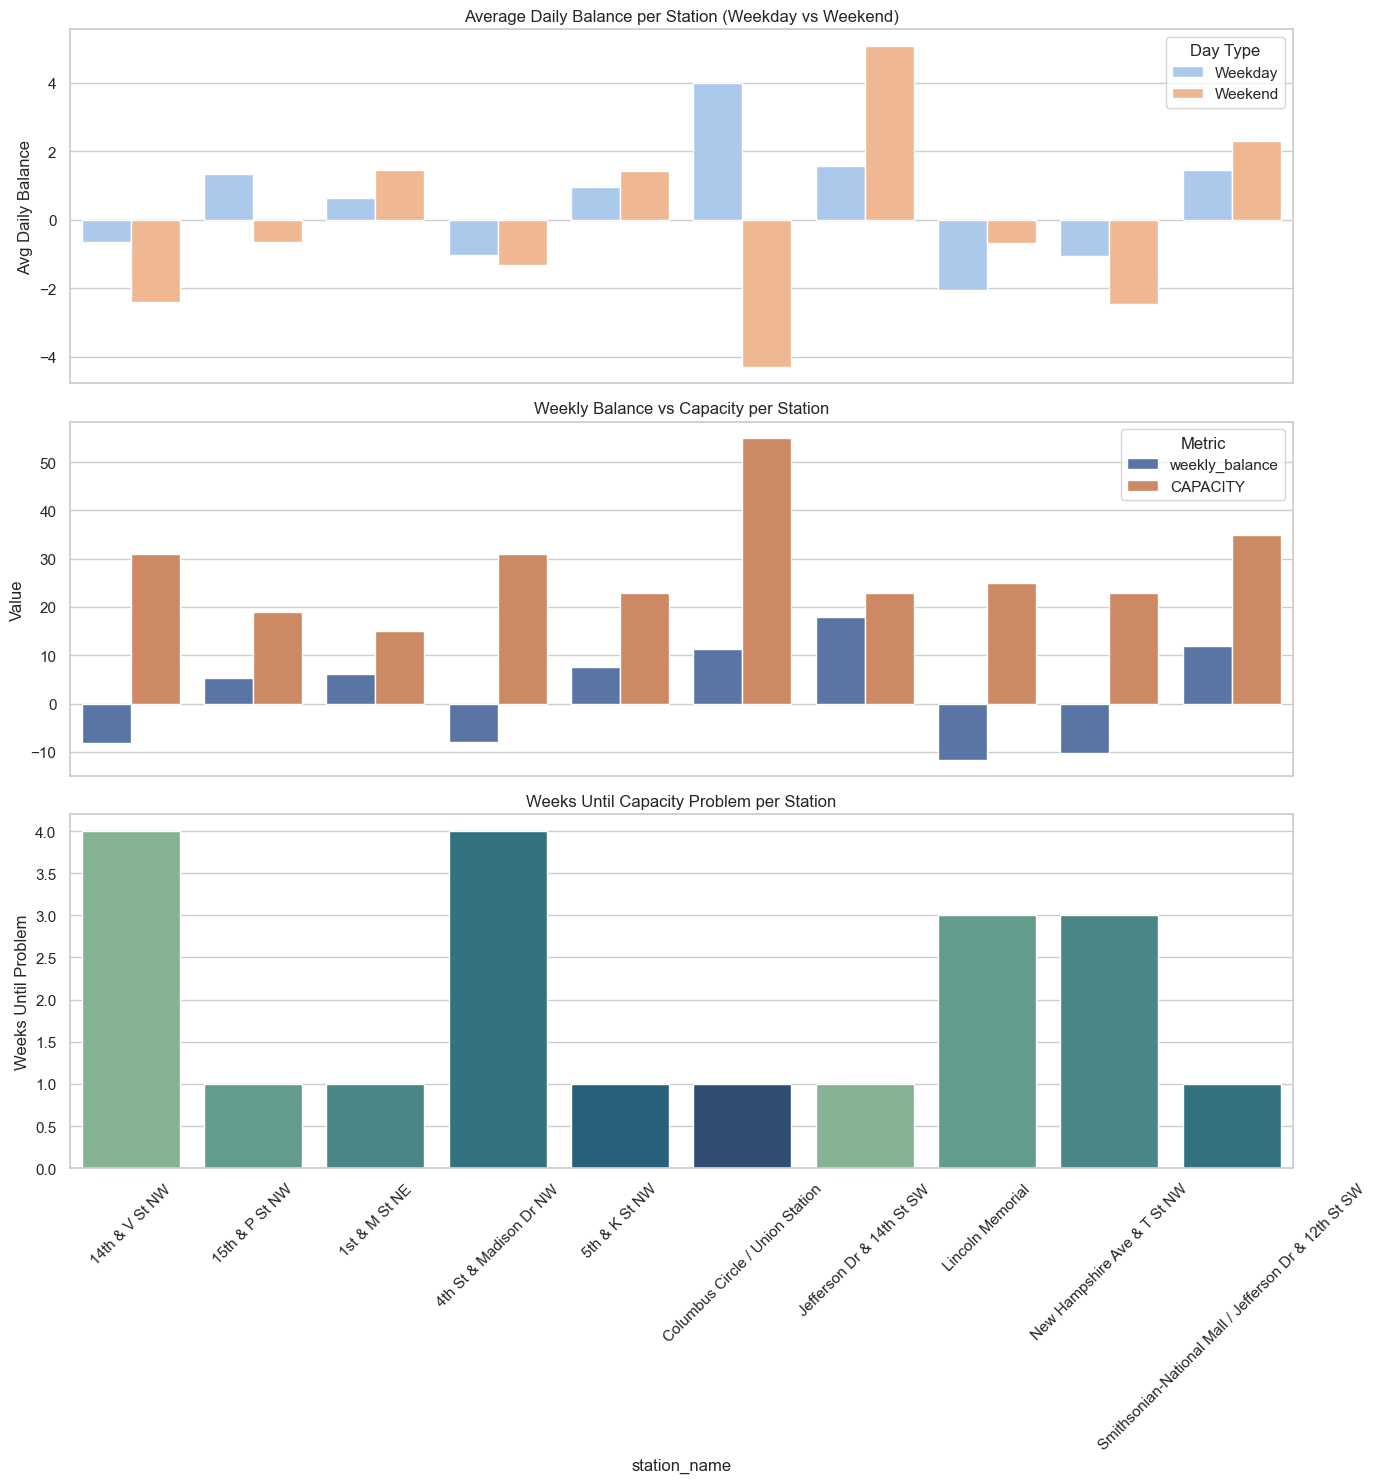

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the uploaded CSV file
file_path = "final_weekly_balance_results.csv"
final_result = pd.read_csv(file_path)

# Set improved color palette
palette_daytype = sns.color_palette("pastel")  # Soft colors for Day Type
palette_metrics = ["#4C72B0", "#DD8452"]        # Custom soft blue and orange for balance vs capacity
palette_weeks = sns.color_palette("crest", as_cmap=False)  # Smooth blue-green gradient

# Create three subplots (swapping 2nd and 3rd, with better colors)
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
sns.set(style="whitegrid")

# Plot 1: Average Daily Balance (Weekday vs Weekend)
avg_melted = final_result.melt(id_vars="station_name", value_vars=["Weekday", "Weekend"],
                               var_name="Day Type", value_name="Avg Daily Balance")
sns.barplot(data=avg_melted, x="station_name", y="Avg Daily Balance", hue="Day Type", ax=axes[0], palette=palette_daytype)
axes[0].set_title("Average Daily Balance per Station (Weekday vs Weekend)")
axes[0].set_ylabel("Avg Daily Balance")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Weekly Balance vs Capacity
weekly_melted = final_result.melt(id_vars="station_name", value_vars=["weekly_balance", "CAPACITY"],
                                  var_name="Metric", value_name="Value")
sns.barplot(data=weekly_melted, x="station_name", y="Value", hue="Metric", ax=axes[1], palette=palette_metrics)
axes[1].set_title("Weekly Balance vs Capacity per Station")
axes[1].set_ylabel("Value")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Weeks Until Problem
sns.barplot(data=final_result, x="station_name", y="weeks_until_problem", ax=axes[2], palette=palette_weeks)
axes[2].set_title("Weeks Until Capacity Problem per Station")
axes[2].set_ylabel("Weeks Until Problem")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_21084\2386263205.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=final_result, x="station_name", y="weeks_until_problem", ax=axes[2], palette="viridis")


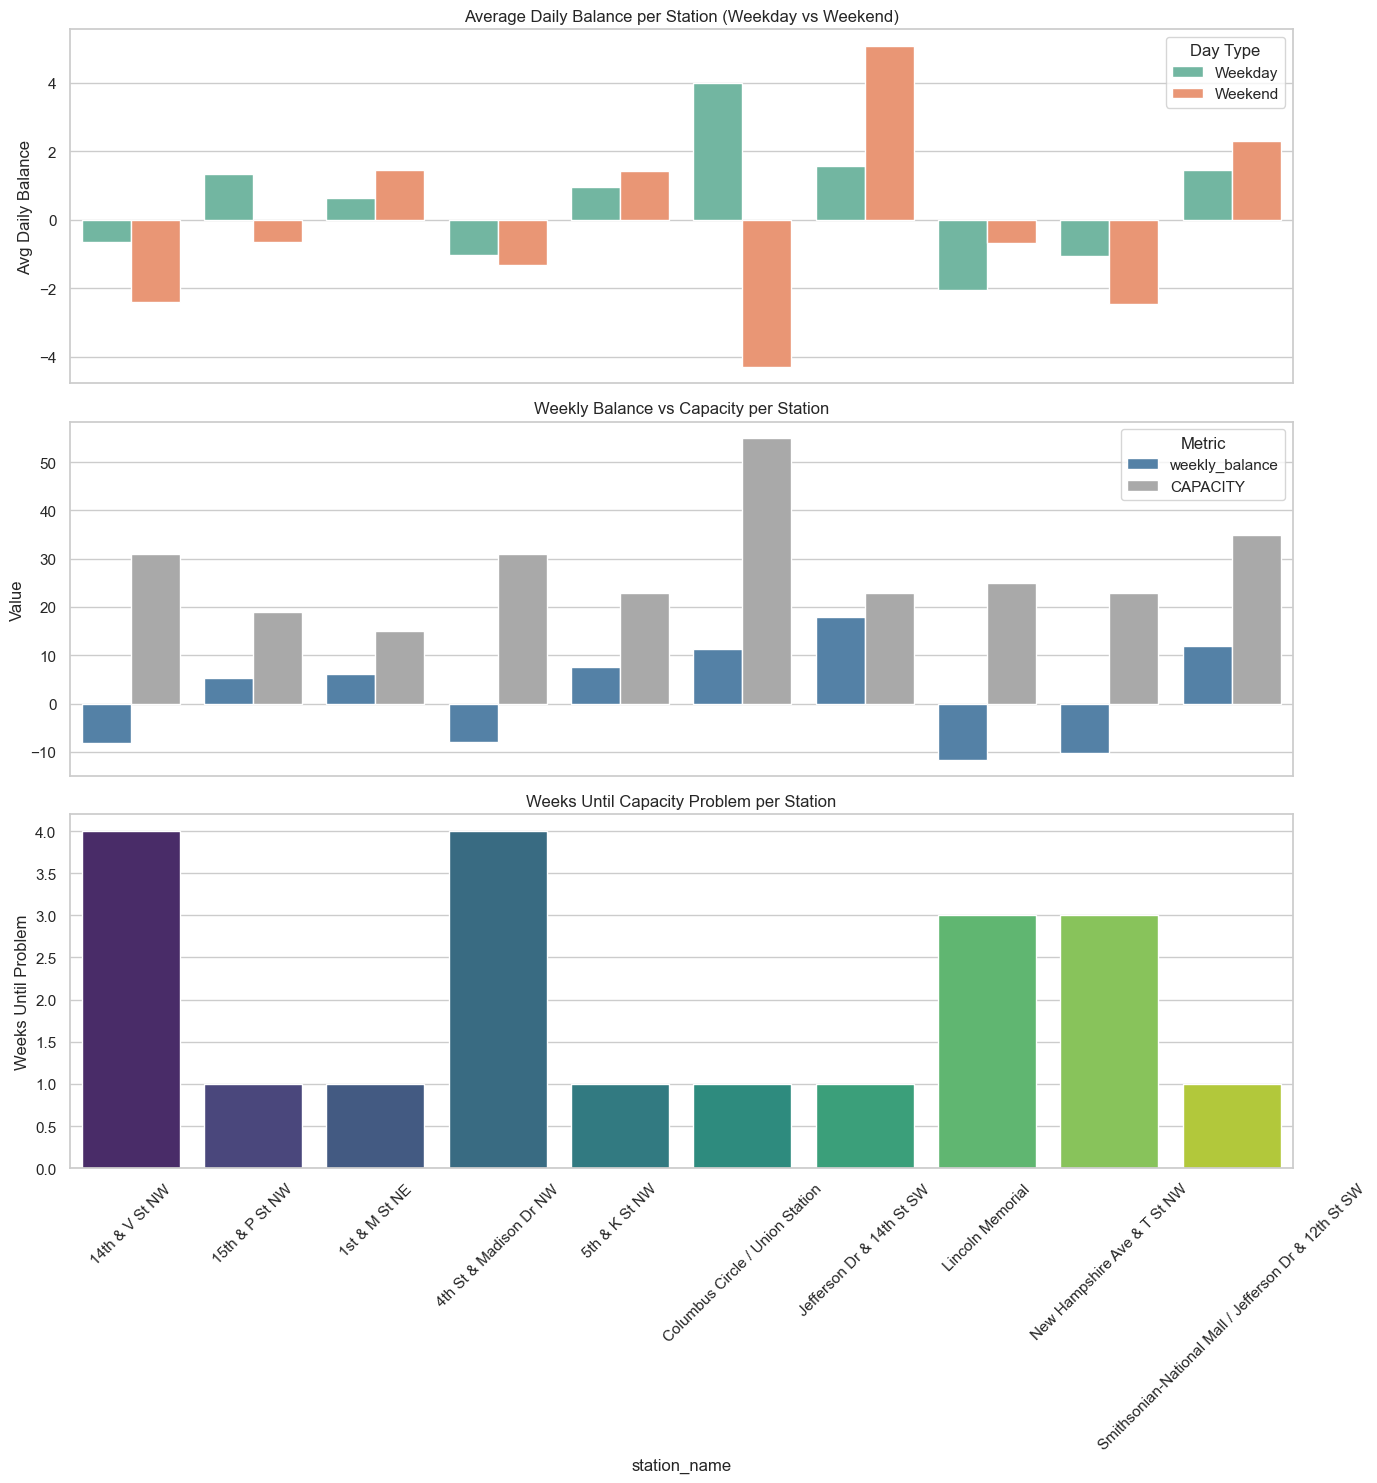

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the uploaded file
file_path = "final_weekly_balance_results.csv"
final_result = pd.read_csv(file_path)

# Set plot style
sns.set(style="whitegrid")

# Create three subplots (swapped and recolored)
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot 1: Average Daily Balance (Weekday vs Weekend)
avg_melted = final_result.melt(id_vars="station_name", value_vars=["Weekday", "Weekend"],
                               var_name="Day Type", value_name="Avg Daily Balance")
sns.barplot(data=avg_melted, x="station_name", y="Avg Daily Balance", hue="Day Type", ax=axes[0], palette="Set2")
axes[0].set_title("Average Daily Balance per Station (Weekday vs Weekend)")
axes[0].set_ylabel("Avg Daily Balance")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Weekly Balance vs Capacity (in blue/gray)
weekly_melted = final_result.melt(id_vars="station_name", value_vars=["weekly_balance", "CAPACITY"],
                                  var_name="Metric", value_name="Value")
sns.barplot(data=weekly_melted, x="station_name", y="Value", hue="Metric", ax=axes[1], palette=["steelblue", "darkgray"])
axes[1].set_title("Weekly Balance vs Capacity per Station")
axes[1].set_ylabel("Value")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Weeks Until Problem
sns.barplot(data=final_result, x="station_name", y="weeks_until_problem", ax=axes[2], palette="viridis")
axes[2].set_title("Weeks Until Capacity Problem per Station")
axes[2].set_ylabel("Weeks Until Problem")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


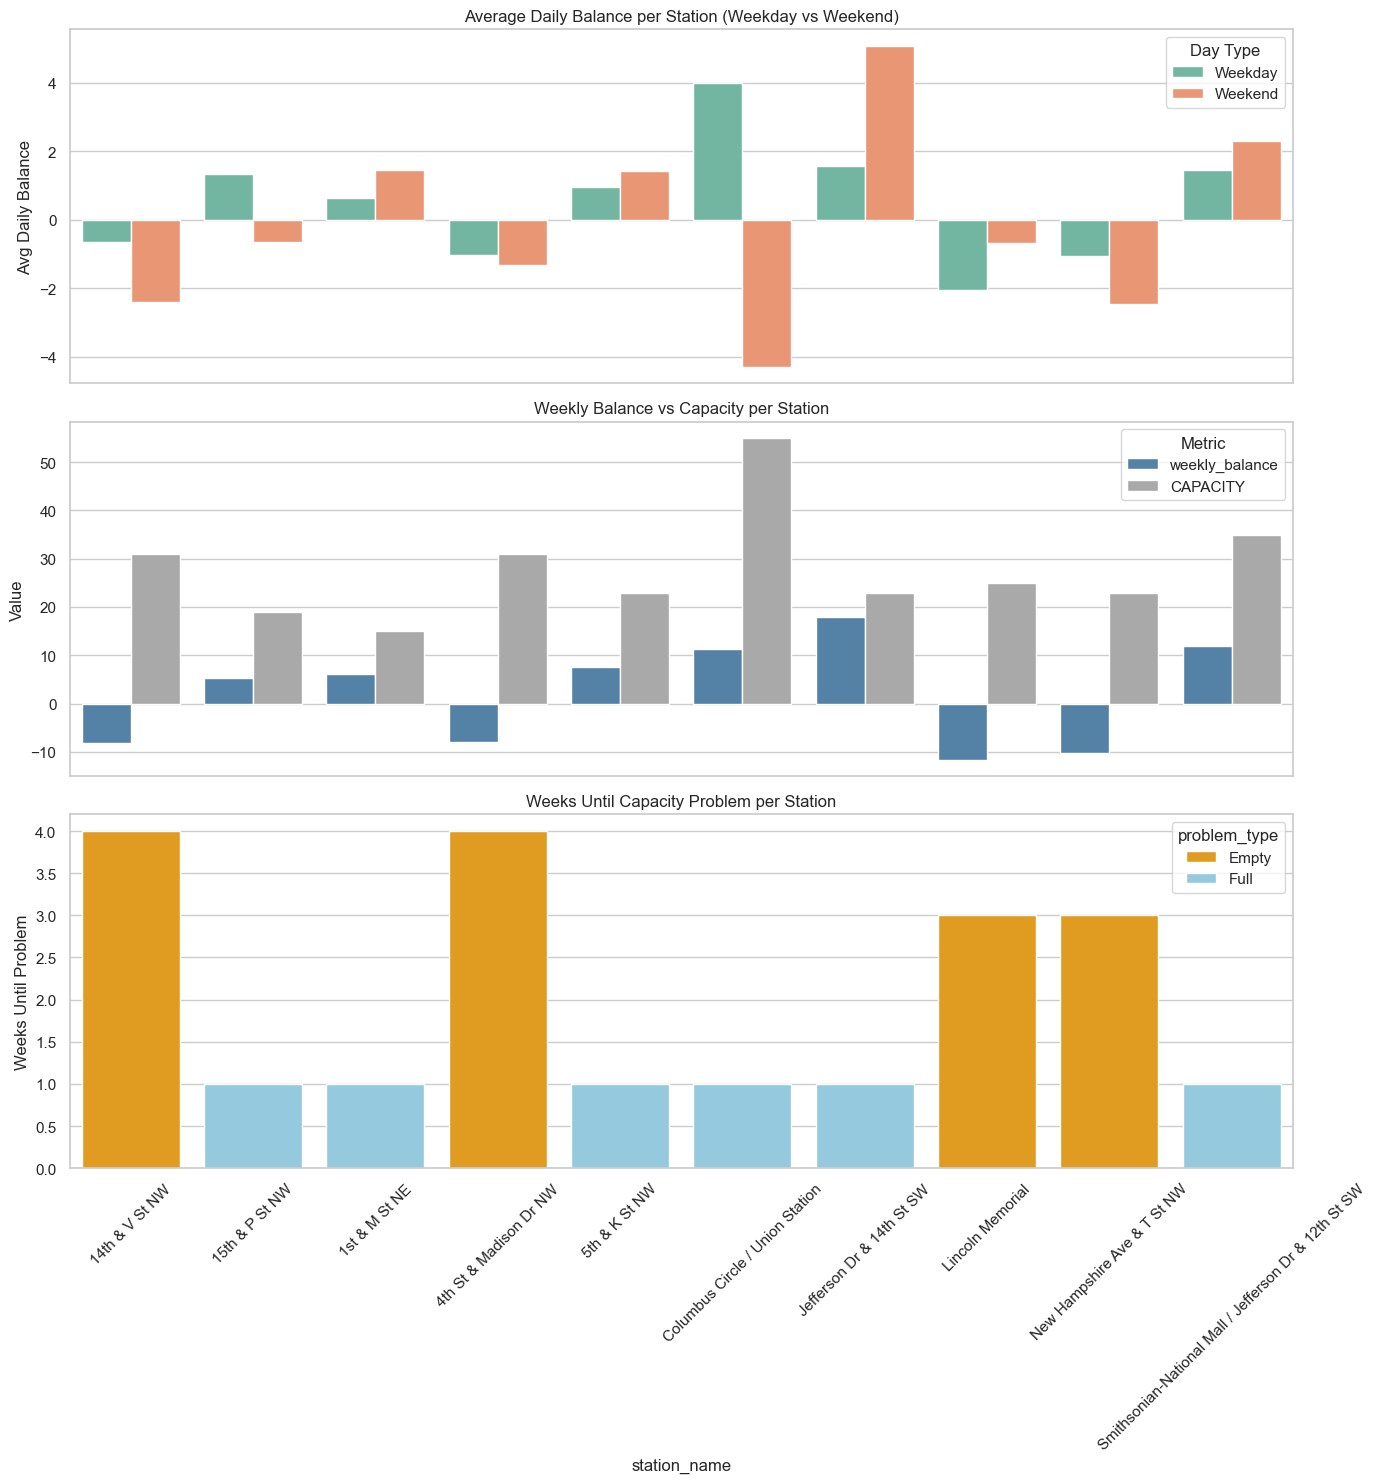

In [ ]:
# Re-import after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the uploaded file
file_path = "final_weekly_balance_results.csv"
final_result = pd.read_csv(file_path)

# Determine if station becomes empty or full
final_result["problem_type"] = final_result["weekly_balance"].apply(lambda x: "Full" if x > 0 else "Empty")

# Set plot style
sns.set(style="whitegrid")

# Create three subplots (swapped and recolored)
fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)

# Plot 1: Average Daily Balance (Weekday vs Weekend)
avg_melted = final_result.melt(id_vars="station_name", value_vars=["Weekday", "Weekend"],
                               var_name="Day Type", value_name="Avg Daily Balance")
sns.barplot(data=avg_melted, x="station_name", y="Avg Daily Balance", hue="Day Type", ax=axes[0], palette="Set2")
axes[0].set_title("Average Daily Balance per Station (Weekday vs Weekend)")
axes[0].set_ylabel("Avg Daily Balance")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Weekly Balance vs Capacity (in blue/gray)
weekly_melted = final_result.melt(id_vars="station_name", value_vars=["weekly_balance", "CAPACITY"],
                                  var_name="Metric", value_name="Value")
sns.barplot(data=weekly_melted, x="station_name", y="Value", hue="Metric", ax=axes[1], palette=["steelblue", "darkgray"])
axes[1].set_title("Weekly Balance vs Capacity per Station")
axes[1].set_ylabel("Value")
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Weeks Until Problem, color by type (Full vs Empty)
palette_map = {"Full": "skyblue", "Empty": "orange"}
sns.barplot(data=final_result, x="station_name", y="weeks_until_problem",
            hue="problem_type", palette=palette_map, ax=axes[2])
axes[2].set_title("Weeks Until Capacity Problem per Station")
axes[2].set_ylabel("Weeks Until Problem")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


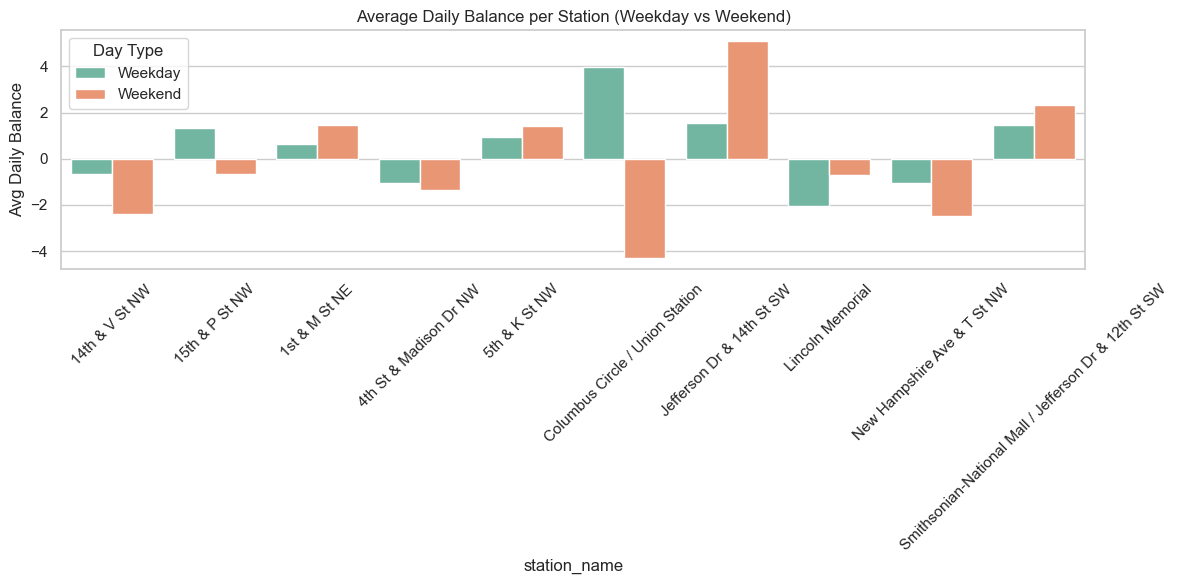

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
final_result = pd.read_csv("final_weekly_balance_results.csv")

# Plot-Stil
sns.set(style="whitegrid")

# Melt für ersten Plot
avg_melted = final_result.melt(id_vars="station_name", value_vars=["Weekday", "Weekend"],
                               var_name="Day Type", value_name="Avg Daily Balance")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_melted, x="station_name", y="Avg Daily Balance", hue="Day Type", palette="Set2")
plt.title("Average Daily Balance per Station (Weekday vs Weekend)")
plt.ylabel("Avg Daily Balance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


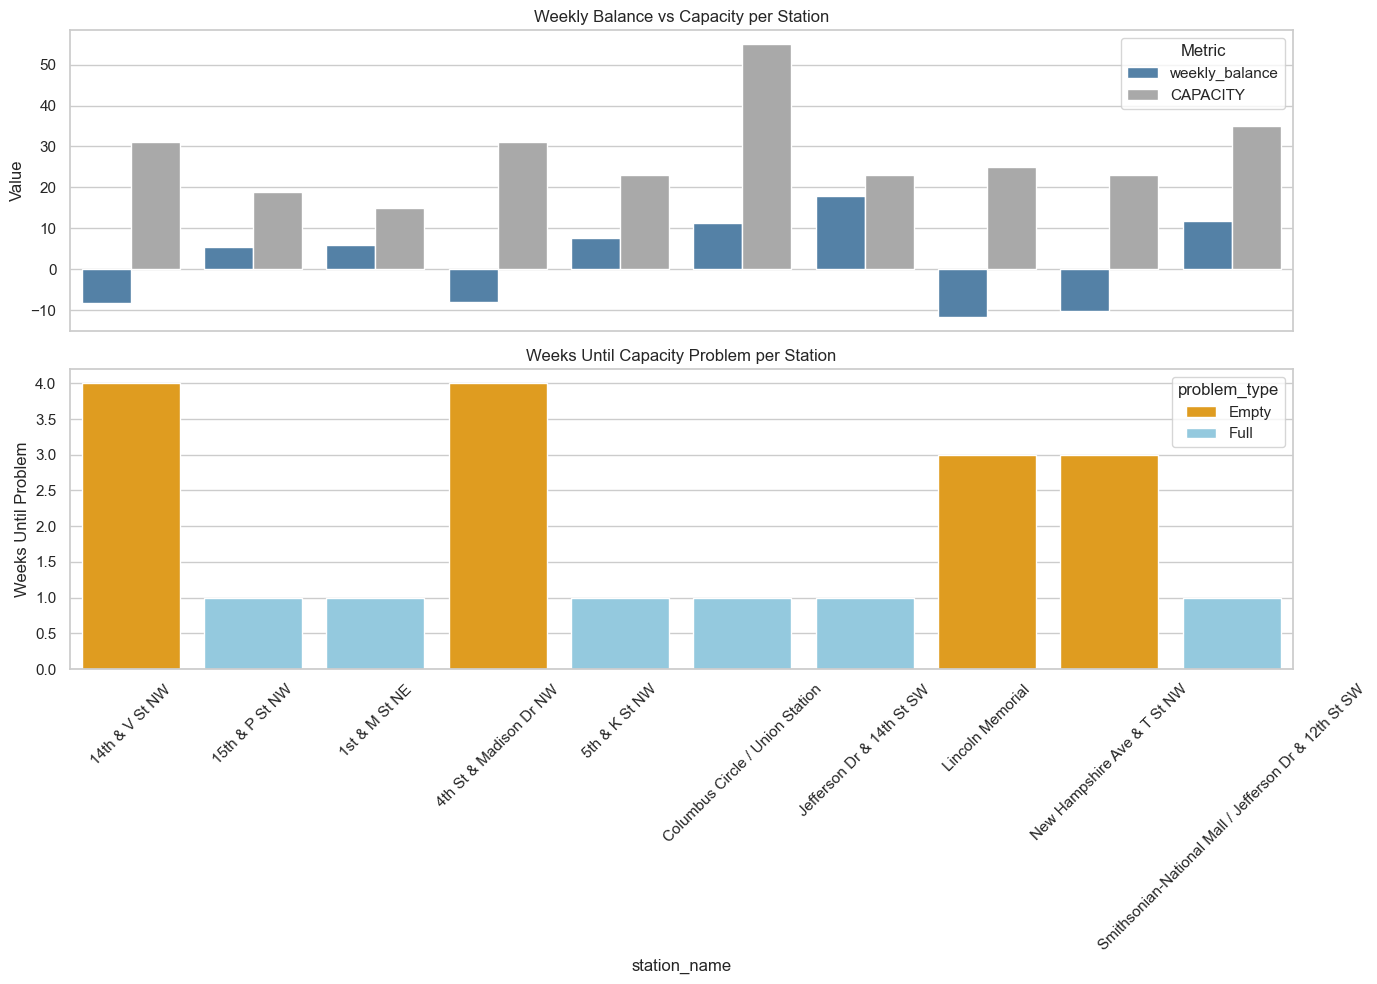

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden
final_result = pd.read_csv("final_weekly_balance_results.csv")

# Problemtyp berechnen
final_result["problem_type"] = final_result["weekly_balance"].apply(lambda x: "Full" if x > 0 else "Empty")

# Plot-Stil
sns.set(style="whitegrid")

# Subplots für Plot 2 und 3
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 📊 Plot 2: Weekly Balance vs Capacity
weekly_melted = final_result.melt(id_vars="station_name", value_vars=["weekly_balance", "CAPACITY"],
                                  var_name="Metric", value_name="Value")
sns.barplot(data=weekly_melted, x="station_name", y="Value", hue="Metric", ax=axes[0], palette=["steelblue", "darkgray"])
axes[0].set_title("Weekly Balance vs Capacity per Station")
axes[0].set_ylabel("Value")
axes[0].tick_params(axis='x', rotation=45)

# 📊 Plot 3: Weeks Until Capacity Problem
palette_map = {"Full": "skyblue", "Empty": "orange"}
sns.barplot(data=final_result, x="station_name", y="weeks_until_problem",
            hue="problem_type", palette=palette_map, ax=axes[1])
axes[1].set_title("Weeks Until Capacity Problem per Station")
axes[1].set_ylabel("Weeks Until Problem")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
final = pd.read_csv("final_weekly_balance_results.csv")
print(final.columns)

Index(['station_name', 'Weekday', 'Weekend', 'weekly_balance', 'CAPACITY',
       'weeks_until_problem'],
      dtype='object')


Merge Wetter mit Final Weekly Balance Datei 

In [30]:
import pandas as pd

# Lade Daten
df = pd.read_csv("cleaned_full_dataset.csv", parse_dates=["started_at", "ended_at"])

# Extrahiere Zeitinformationen
df["year"] = df["started_at"].dt.isocalendar().year
df["week"] = df["started_at"].dt.isocalendar().week
df["weekday"] = df["started_at"].dt.weekday
df["week_type"] = df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Definiere Top-10-Stationen
top_stations = [
    "14th & V St NW", "15th & P St NW", "1st & M St NE", "4th St & Madison Dr NW",
    "5th & K St NW", "Columbus Circle / Union Station", "Jefferson Dr & 14th St SW",
    "Lincoln Memorial", "New Hampshire Ave & T St NW",
    "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filtere nach Top-Stationen
df_filtered = df[
    df["start_station_name"].isin(top_stations) |
    df["end_station_name"].isin(top_stations)
].copy()

# Gruppiere Abfahrten und Ankünfte
departures = df_filtered.groupby(["start_station_name", "year", "week", "week_type"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "year", "week", "week_type"]).size().reset_index(name="arrivals")

# Vereinheitliche Spaltennamen
departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge und Balance berechnen
balance_df = pd.merge(departures, arrivals, on=["station_name", "year", "week", "week_type"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Durchschnittliche tägliche Balance pro Woche und Station
weekly_avg_balance = balance_df.groupby(["station_name", "year", "week", "week_type"])["balance"].mean().reset_index()
weekly_avg_balance.rename(columns={"balance": "avg_daily_balance"}, inplace=True)

# Ergebnis speichern (optional)
weekly_avg_balance.to_csv("weekly_avg_balance_top10_test.csv", index=False)


C:\Users\Tiba\AppData\Local\Temp\ipykernel_7768\2152129163.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_full_dataset.csv", parse_dates=["started_at", "ended_at"])


In [31]:
# Wetterdaten laden
weather = pd.read_csv("CBS_2021-2023_Daily_Weather_Cleaned.csv", parse_dates=["Date"])

# Jahr und Woche aus Datum extrahieren
weather["year"] = weather["Date"].dt.isocalendar().year
weather["week"] = weather["Date"].dt.isocalendar().week

# Wöchentliche Wetter-Metriken berechnen
weekly_weather = weather.groupby(["year", "week"]).agg({
    "temperature_2m_mean (°C)": "mean",
    "apparent_temperature_mean (°C)": "mean",
    "windspeed_10m_max (km/h)": "mean",
    "rainy_day": "sum",
    "warm_day": "sum"
}).reset_index()

# Lade vorher gespeicherte Datei mit wöchentlicher Balance
balance_df = pd.read_csv("weekly_avg_balance_top10_test.csv")

# Merge mit Wetterdaten
merged_df = pd.merge(balance_df, weekly_weather, on=["year", "week"], how="left")

# Ergebnis speichern
merged_df.to_csv("weekly_balance_top10_with_weather.csv", index=False)


In [35]:
final = pd.read_csv("weekly_balance_top10_with_weather.csv")
print(final.columns)

Index(['station_name', 'year', 'week', 'week_type', 'avg_daily_balance',
       'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
       'windspeed_10m_max (km/h)', 'rainy_day', 'warm_day'],
      dtype='object')


In [40]:
import pandas as pd

# Datei laden
df = pd.read_csv("weekly_balance_top10_with_weather.csv")

# Anzahl der Tage je nach Wochentyp
df["days_in_week"] = df["week_type"].map({"Weekday": 5, "Weekend": 2})

# Wöchentliche Balance berechnen
df["weekly_balance"] = df["avg_daily_balance"] * df["days_in_week"]

# Ergebnis speichern
df.to_csv("weekly_balance_top10_with_weather_and_total.csv", index=False)


In [41]:
final = pd.read_csv("weekly_balance_top10_with_weather_and_total.csv")
print(final.columns)

Index(['station_name', 'year', 'week', 'week_type', 'avg_daily_balance',
       'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
       'windspeed_10m_max (km/h)', 'rainy_day', 'warm_day', 'days_in_week',
       'weekly_balance'],
      dtype='object')


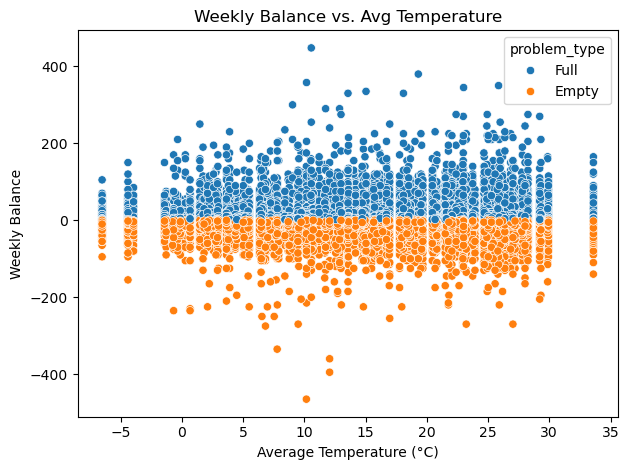

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

merged = pd.read_csv("weekly_balance_top10_with_weather_and_total.csv")


# Annahme: 'merged' enthält deine Daten mit weekly_balance
merged["problem_type"] = merged["weekly_balance"].apply(lambda x: "Full" if x > 0 else "Empty")


sns.scatterplot(data=merged, x="temperature_2m_mean (°C)", y="weekly_balance", hue="problem_type")
plt.title("Weekly Balance vs. Avg Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Weekly Balance")
plt.tight_layout()
plt.show()


In [46]:
final = pd.read_csv("weekly_balance_top10_with_weather_and_total.csv")
print(final.columns)

Index(['station_name', 'year', 'week', 'week_type', 'avg_daily_balance',
       'temperature_2m_mean (°C)', 'apparent_temperature_mean (°C)',
       'windspeed_10m_max (km/h)', 'rainy_day', 'warm_day', 'days_in_week',
       'weekly_balance'],
      dtype='object')


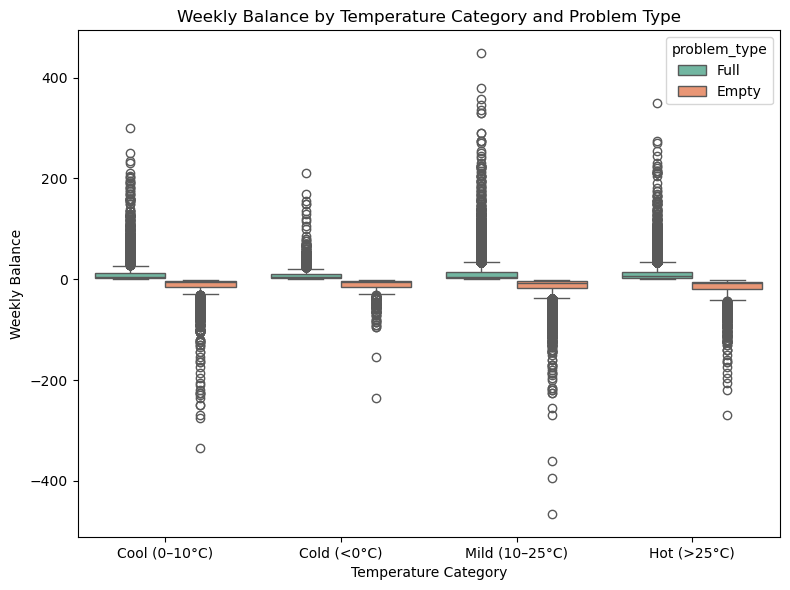

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weekly_balance_top10_with_weather_and_total.csv")

# Wenn noch nicht vorhanden: problem_type anhand der weekly_balance bestimmen
df["problem_type"] = df["weekly_balance"].apply(lambda x: "Empty" if x < 0 else "Full")


# Temperaturkategorien definieren
def categorize_temp(temp):
    if temp < 0:
        return "Cold (<0°C)"
    elif temp < 10:
        return "Cool (0–10°C)"
    elif temp < 25:
        return "Mild (10–25°C)"
    else:
        return "Hot (>25°C)"

df["temp_category"] = df["temperature_2m_mean (°C)"].apply(categorize_temp)

# Boxplot: Weekly Balance nach Temperaturkategorie
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="temp_category", y="weekly_balance", hue="problem_type", palette="Set2")
plt.title("Weekly Balance by Temperature Category and Problem Type")
plt.xlabel("Temperature Category")
plt.ylabel("Weekly Balance")
plt.tight_layout()
plt.show()


C:\Users\Tiba\AppData\Local\Temp\ipykernel_7768\832045676.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="temp_category", y="weekly_balance", hue="problem_type", ci="sd", palette="Set2")


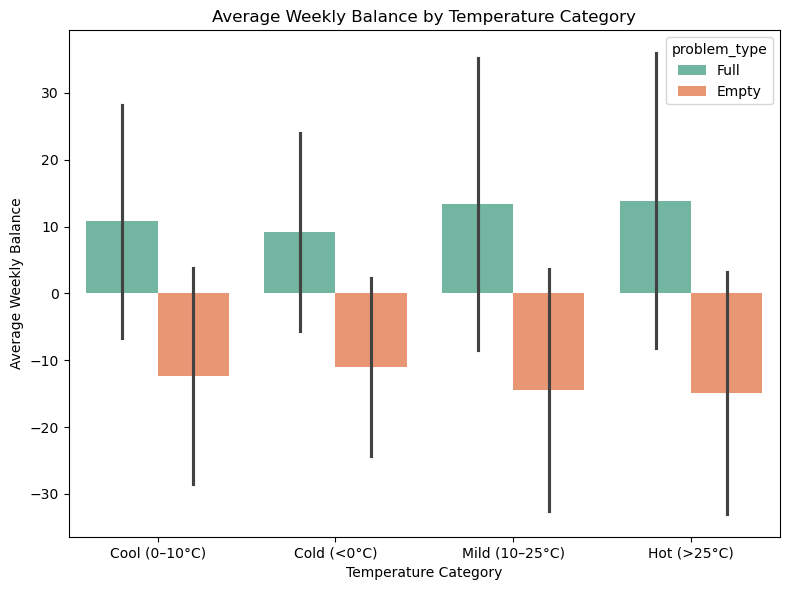

In [49]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="temp_category", y="weekly_balance", hue="problem_type", ci="sd", palette="Set2")
plt.title("Average Weekly Balance by Temperature Category")
plt.xlabel("Temperature Category")
plt.ylabel("Average Weekly Balance")
plt.tight_layout()
plt.show()


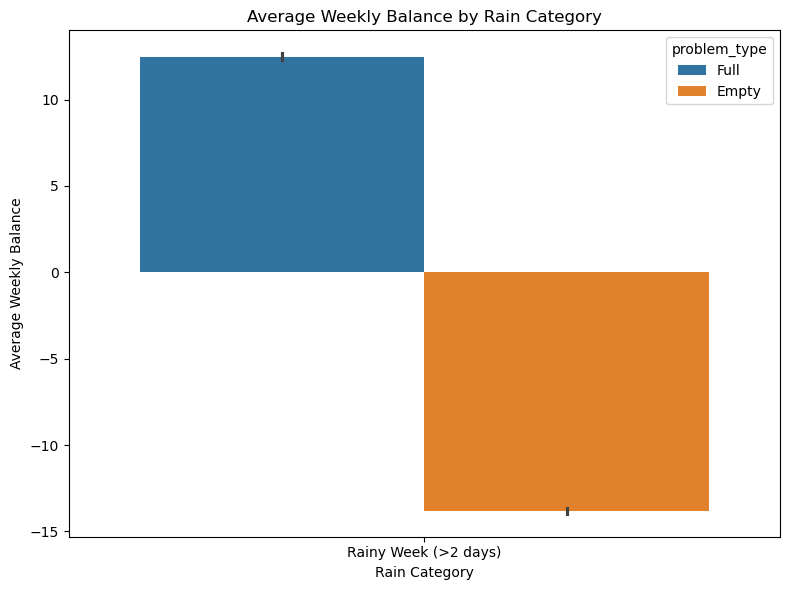

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df["rainy_day"] = pd.to_numeric(df["rainy_day"], errors="coerce")


# Beispiel: Regen-Kategorie basierend auf Anzahl Regentage
def categorize_rain(days):
    if days == 0:
        return "No Rain"
    elif days <= 2:
        return "Light Rain (1–2 days)"
    else:
        return "Rainy Week (>2 days)"

# Kategorisieren
df["rain_category"] = df["rainy_day"].apply(categorize_rain)

# Barplot zeichnen
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="rain_category", y="weekly_balance", hue="problem_type")
plt.title("Average Weekly Balance by Rain Category")
plt.xlabel("Rain Category")
plt.ylabel("Average Weekly Balance")
plt.tight_layout()
plt.show()


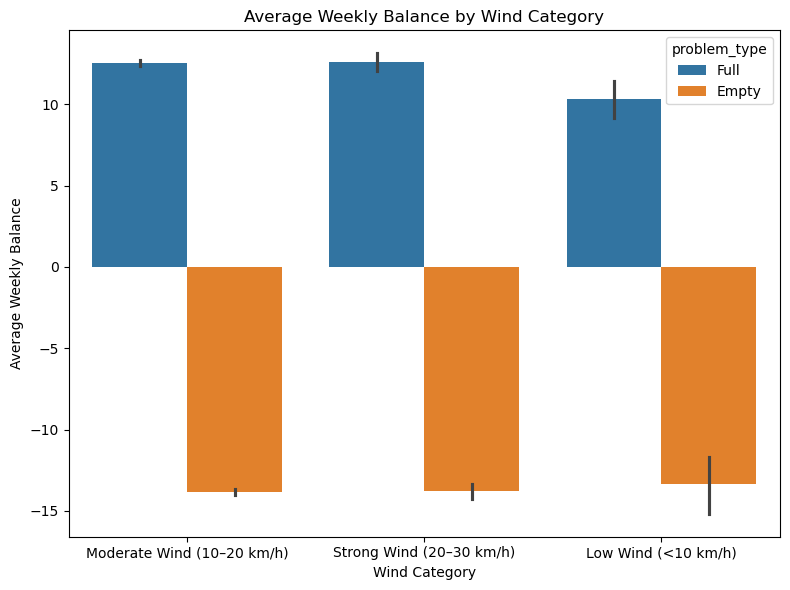

In [52]:
# Wind kategorisieren (nach max. Windgeschwindigkeit)

df["windspeed_10m_max (km/h)"] = pd.to_numeric(df["windspeed_10m_max (km/h)"], errors="coerce")

def categorize_wind(wind):
    if wind < 10:
        return "Low Wind (<10 km/h)"
    elif wind < 20:
        return "Moderate Wind (10–20 km/h)"
    elif wind < 30:
        return "Strong Wind (20–30 km/h)"
    else:
        return "Very Strong Wind (>30 km/h)"

df["wind_category"] = df["windspeed_10m_max (km/h)"].apply(categorize_wind)

# Barplot für Wind
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="wind_category", y="weekly_balance", hue="problem_type")
plt.title("Average Weekly Balance by Wind Category")
plt.xlabel("Wind Category")
plt.ylabel("Average Weekly Balance")
plt.tight_layout()
plt.show()


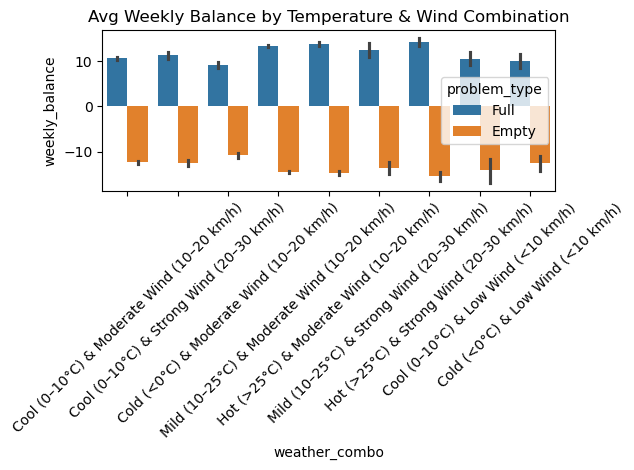

In [53]:
import seaborn as sns

# Beispiel: neue Spalte für kombinierte Bedingungen
df["weather_combo"] = df["temp_category"] + " & " + df["wind_category"]

# Diagramm
sns.barplot(data=df, x="weather_combo", y="weekly_balance", hue="problem_type")
plt.xticks(rotation=45)
plt.title("Avg Weekly Balance by Temperature & Wind Combination")
plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(data=final_result, x="mean_temperature", y="weekly_balance", hue="problem_type")
plt.title("Weekly Balance vs. Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Weekly Balance")
plt.show()


In [64]:
import pandas as pd
import folium

# Reload necessary CSV files
final_result = pd.read_csv("final_weekly_balance_results.csv")
locations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Merge station data with coordinates
merged = pd.merge(final_result, locations_df, left_on="station_name", right_on="NAME", how="left")

# Create base map centered on Washington, DC
m = folium.Map(location=[38.9072, -77.0369], zoom_start=13)

# Add markers based on weekly balance
for _, row in merged.iterrows():
    color = "blue" if row["weekly_balance"] >= 0 else "orange"
    popup_text = f"<b>{row['station_name']}</b><br>Weekly Balance: {row['weekly_balance']:.2f}"
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=folium.Popup(popup_text, max_width=250),
        icon=folium.Icon(color=color)
    ).add_to(m)


# Save map to HTML file
map_path = "Bikeshare_Weekly_Balance_Map.html"
m.save(map_path)

map_path  # Return the path so user can download or view the map


'Bikeshare_Weekly_Balance_Map.html'

In [69]:
import pandas as pd
import folium
from folium.plugins import BeautifyIcon

# Load data
final_result = pd.read_csv("final_weekly_balance_results.csv")
locations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Merge for coordinates
merged = pd.merge(final_result, locations_df, left_on="station_name", right_on="NAME", how="left")

# Create base map centered on Washington, DC
m = folium.Map(location=[38.9072, -77.0369], zoom_start=13)

# Add station markers with bicycle icon
for _, row in merged.iterrows():
    color = "blue" if row["weekly_balance"] >= 0 else "orange"
    popup_text = f"<b>{row['station_name']}</b><br>Weekly Balance: {row['weekly_balance']:.2f}"
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=folium.Popup(popup_text, max_width=250),
        icon=BeautifyIcon(
            icon="bicycle",
            icon_shape='marker',
            background_color=color,
            text_color="white"
        )
    ).add_to(m)

# Define landmarks (Capitol Hill removed, Columbia Heights adjusted)
landmarks = [
    {"name": "NoMa–Gallaudet U Metro", "lat": 38.9076, "lon": -77.0022, "type": "Train Station"},
    {"name": "Gallery Place-Chinatown Metro", "lat": 38.8983, "lon": -77.0219, "type": "Train Station"},
    {"name": "Washington Monument", "lat": 38.8895, "lon": -77.0353, "type": "Landmark"},
    {"name": "Union Station", "lat": 38.8977, "lon": -77.0069, "type": "Train Station"},
    {"name": "Columbia Heights", "lat": 38.9321, "lon": -77.0337, "type": "Residential Area"},
]

# Icon and color mapping
icon_map = {
    "Landmark": "university",
    "Train Station": "train",
    "Residential Area": "home"
}
color_map = {
    "Landmark": "purple",
    "Train Station": "green",
    "Residential Area": "cadetblue"
}

# Add landmark markers
for landmark in landmarks:
    folium.Marker(
        location=[landmark["lat"], landmark["lon"]],
        popup=landmark["name"],
        icon=BeautifyIcon(
            icon=icon_map[landmark["type"]],
            icon_shape='marker',
            background_color=color_map[landmark["type"]],
            text_color="white"
        )
    ).add_to(m)

# Add legend in English
legend_html = """
<div style="position: fixed; 
     bottom: 40px; left: 40px; width: 250px; height: 200px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:8px; padding: 10px;">
<b>Legend:</b><br>
<i class="fa fa-bicycle fa-2x" style="color:blue"></i> More Arrivals<br>
<i class="fa fa-bicycle fa-2x" style="color:orange"></i> More Departures<br>
<i class="fa fa-university fa-2x" style="color:purple"></i> Landmark<br>
<i class="fa fa-train fa-2x" style="color:green"></i> Train Station<br>
<i class="fa fa-home fa-2x" style="color:cadetblue"></i> Residential Area
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save map to file
output_path = "Bikeshare_Map_With_English_Legend.html"
m.save(output_path)
output_path


'Bikeshare_Map_With_English_Legend.html'

In [65]:
import pandas as pd
import folium
from folium.plugins import BeautifyIcon

# Load data
final_result = pd.read_csv("final_weekly_balance_results.csv")
locations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Merge for coordinates
merged = pd.merge(final_result, locations_df, left_on="station_name", right_on="NAME", how="left")

# Create base map
m = folium.Map(location=[38.9072, -77.0369], zoom_start=13)

# Add station markers with bike icon
for _, row in merged.iterrows():
    color = "blue" if row["weekly_balance"] >= 0 else "orange"
    popup_text = f"<b>{row['station_name']}</b><br>Weekly Balance: {row['weekly_balance']:.2f}"
    folium.Marker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        popup=folium.Popup(popup_text, max_width=250),
        icon=BeautifyIcon(
            icon="bicycle",
            icon_shape='marker',
            background_color=color,
            text_color="white"
        )
    ).add_to(m)

# Define landmarks (adjusted: remove Capitol Hill, keep Columbia Heights)
landmarks = [
    {"name": "Lincoln Memorial", "lat": 38.8893, "lon": -77.0502, "type": "Sehenswürdigkeit"},
    {"name": "Washington Monument", "lat": 38.8895, "lon": -77.0353, "type": "Sehenswürdigkeit"},
    {"name": "Union Station", "lat": 38.8977, "lon": -77.0069, "type": "Bahnhof"},
    {"name": "Columbia Heights", "lat": 38.9207, "lon": -77.0324, "type": "Wohngebiet"},
]

# Custom icons and colors
icon_map = {
    "Sehenswürdigkeit": "university",
    "Bahnhof": "train",
    "Wohngebiet": "home"
}
color_map = {
    "Sehenswürdigkeit": "purple",
    "Bahnhof": "green",
    "Wohngebiet": "cadetblue"
}

# Add landmark markers
for landmark in landmarks:
    folium.Marker(
        location=[landmark["lat"], landmark["lon"]],
        popup=landmark["name"],
        icon=BeautifyIcon(
            icon=icon_map[landmark["type"]],
            icon_shape='marker',
            background_color=color_map[landmark["type"]],
            text_color="white"
        )
    ).add_to(m)

# Add legend
legend_html = """
<div style="position: fixed; 
     bottom: 40px; left: 40px; width: 250px; height: 200px; 
     background-color: white; z-index:9999; font-size:14px;
     border:2px solid grey; border-radius:8px; padding: 10px;">
<b>Legend:</b><br>
<i class="fa fa-bicycle fa-2x" style="color:blue"></i> More Arrivals<br>
<i class="fa fa-bicycle fa-2x" style="color:orange"></i> More Departures<br>
<i class="fa fa-university fa-2x" style="color:purple"></i> Sehenswürdigkeit<br>
<i class="fa fa-train fa-2x" style="color:green"></i> Bahnhof<br>
<i class="fa fa-home fa-2x" style="color:cadetblue"></i> Wohngebiet
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save map
output_path = "Bikeshare_Map_With_Legend_Updated.html"
m.save(output_path)
output_path


'Bikeshare_Map_With_Legend_Updated.html'

In [40]:
# Re-import after code execution reset
import pandas as pd

# Reload trip and station data
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert datetime and extract date & weekday
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])
df["date"] = df["started_at"].dt.date
df["weekday"] = df["started_at"].dt.weekday  # 0 = Monday ... 6 = Sunday

# Top 10 selected stations
top_stations = [
    "14th & V St NW", "15th & P St NW", "1st & M St NE", "4th St & Madison Dr NW", "5th & K St NW",
    "Columbus Circle / Union Station", "Jefferson Dr & 14th St SW", "Lincoln Memorial",
    "New Hampshire Ave & T St NW", "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter trips involving top stations
df_filtered = df[
    (df["start_station_name"].isin(top_stations)) |
    (df["end_station_name"].isin(top_stations))
].copy()

# Group departures and arrivals per day and weekday
departures = df_filtered.groupby(["start_station_name", "date", "weekday"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "weekday"]).size().reset_index(name="arrivals")

departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge and calculate daily balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "weekday"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Filter again for top stations
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Average balance per weekday (Monday to Friday = 0 to 4)
weekday_avg = balance_df[balance_df["weekday"] < 5].groupby(["station_name", "weekday"])["balance"].mean().reset_index()
weekday_avg.rename(columns={"balance": "avg_balance"}, inplace=True)

# Now sum the 5 weekdays to get total average weekday balance
total_weekday_balance = weekday_avg.groupby("station_name")["avg_balance"].sum().reset_index()
total_weekday_balance.rename(columns={"avg_balance": "total_weekday_balance"}, inplace=True)

print(total_weekday_balance)

                                        station_name  total_weekday_balance
0                                     14th & V St NW              -3.309040
1                                     15th & P St NW               6.722358
2                                      1st & M St NE               3.160256
3                             4th St & Madison Dr NW              -5.194680
4                                      5th & K St NW               4.743590
5                    Columbus Circle / Union Station              19.870980
6                          Jefferson Dr & 14th St SW               7.747866
7                                   Lincoln Memorial             -10.225759
8                        New Hampshire Ave & T St NW              -5.228605
9  Smithsonian-National Mall / Jefferson Dr & 12t...               7.281219


In [41]:
import pandas as pd

# Reload data
trip_df = df
stations_df = pd.read_csv("Capital_Bikeshare_Locations.csv")

# Convert timestamps
trip_df["started_at"] = pd.to_datetime(trip_df["started_at"])
trip_df["ended_at"] = pd.to_datetime(trip_df["ended_at"])
trip_df["date"] = trip_df["started_at"].dt.date
trip_df["weekday"] = trip_df["started_at"].dt.weekday

# Top 10 fixed stations
top_stations = [
    "14th & V St NW", "15th & P St NW", "1st & M St NE", "4th St & Madison Dr NW", "5th & K St NW",
    "Columbus Circle / Union Station", "Jefferson Dr & 14th St SW", "Lincoln Memorial",
    "New Hampshire Ave & T St NW", "Smithsonian-National Mall / Jefferson Dr & 12th St SW"
]

# Filter top station data
df_filtered = trip_df[
    (trip_df["start_station_name"].isin(top_stations)) |
    (trip_df["end_station_name"].isin(top_stations))
].copy()

# Group by station, date and weekday
departures = df_filtered.groupby(["start_station_name", "date", "weekday"]).size().reset_index(name="departures")
arrivals = df_filtered.groupby(["end_station_name", "date", "weekday"]).size().reset_index(name="arrivals")

departures.rename(columns={"start_station_name": "station_name"}, inplace=True)
arrivals.rename(columns={"end_station_name": "station_name"}, inplace=True)

# Merge and calculate balance
balance_df = pd.merge(departures, arrivals, on=["station_name", "date", "weekday"], how="outer").fillna(0)
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]
balance_df = balance_df[balance_df["station_name"].isin(top_stations)]

# Weekday averages
weekday_avg = balance_df[balance_df["weekday"] < 5].groupby(["station_name", "weekday"])["balance"].mean().reset_index()
weekday_avg.rename(columns={"balance": "avg_balance"}, inplace=True)
weekday_total = weekday_avg.groupby("station_name")["avg_balance"].sum().reset_index()
weekday_total.rename(columns={"avg_balance": "total_weekday_balance"}, inplace=True)

# Weekend averages
weekend_avg = balance_df[balance_df["weekday"] >= 5].groupby(["station_name", "weekday"])["balance"].mean().reset_index()
weekend_avg.rename(columns={"balance": "avg_balance"}, inplace=True)
weekend_total = weekend_avg.groupby("station_name")["avg_balance"].sum().reset_index()
weekend_total.rename(columns={"avg_balance": "total_weekend_balance"}, inplace=True)

# Merge and calculate
total_balance = pd.merge(weekday_total, weekend_total, on="station_name")
total_balance = pd.merge(total_balance, stations_df[["NAME", "CAPACITY"]], left_on="station_name", right_on="NAME", how="left")

# Weekly balance
total_balance["weekly_balance"] = total_balance["total_weekday_balance"] + total_balance["total_weekend_balance"]

# Simulation using daily weekday/weekend average
def simulate_station_days(row):
    bikes = row["CAPACITY"]
    weekday_daily = row["total_weekday_balance"] / 5
    weekend_daily = row["total_weekend_balance"] / 2
    balance_pattern = [weekday_daily]*5 + [weekend_daily]*2
    count = 0
    while 0 < bikes < row["CAPACITY"] and count < 1000:
        bikes += balance_pattern[count % 7]
        count += 1
    return count if count < 1000 else ">1000"

# Apply simulation
total_balance["days_until_problem"] = total_balance.apply(simulate_station_days, axis=1)

# Final table
final_result = total_balance[[
    "station_name", "total_weekday_balance", "total_weekend_balance", "weekly_balance", "CAPACITY", "days_until_problem"
]]

print(final_result)

                                        station_name  total_weekday_balance  \
0                                     14th & V St NW              -3.309040   
1                                     15th & P St NW               6.722358   
2                                      1st & M St NE               3.160256   
3                             4th St & Madison Dr NW              -5.194680   
4                                      5th & K St NW               4.743590   
5                    Columbus Circle / Union Station              19.870980   
6                          Jefferson Dr & 14th St SW               7.747866   
7                                   Lincoln Memorial             -10.225759   
8                        New Hampshire Ave & T St NW              -5.228605   
9  Smithsonian-National Mall / Jefferson Dr & 12t...               7.281219   

   total_weekend_balance  weekly_balance  CAPACITY  days_until_problem  
0              -4.796178       -8.105218        31       

In [26]:
# Analyse für eine einzelne Station
station_name = "14th & V St NW"
station_data = balance_df[balance_df["station_name"] == station_name]
print(station_data.groupby("week_type")[["departures", "arrivals", "balance"]].mean())

           departures   arrivals   balance
week_type                                 
Weekday     68.647887  67.987196 -0.660691
Weekend     79.187898  76.789809 -2.398089


In [27]:
# Überprüfen der Gruppierung nach Weekday und Weekend
print(balance_df.groupby("week_type")[["departures", "arrivals"]].sum())

           departures  arrivals
week_type                      
Weekday      605842.0  609829.0
Weekend      295422.0  294914.0


In [28]:
# Anzahl der Datenpunkte für Weekday und Weekend
print(balance_df["week_type"].value_counts())

week_type
Weekday    7774
Weekend    3124
Name: count, dtype: int64


In [29]:
# Durchschnittliche Balance für Weekday und Weekend
weekday_balance = balance_df[balance_df["week_type"] == "Weekday"]["balance"].mean()
weekend_balance = balance_df[balance_df["week_type"] == "Weekend"]["balance"].mean()

print(f"Durchschnittliche Balance an Wochentagen: {weekday_balance}")
print(f"Durchschnittliche Balance an Wochenenden: {weekend_balance}")

Durchschnittliche Balance an Wochentagen: 0.5128633907898122
Durchschnittliche Balance an Wochenenden: -0.16261203585147246


In [30]:
# Überprüfen auf fehlende Werte
print(balance_df.isnull().sum())

station_name    0
date            0
week_type       0
departures      0
arrivals        0
balance         0
dtype: int64


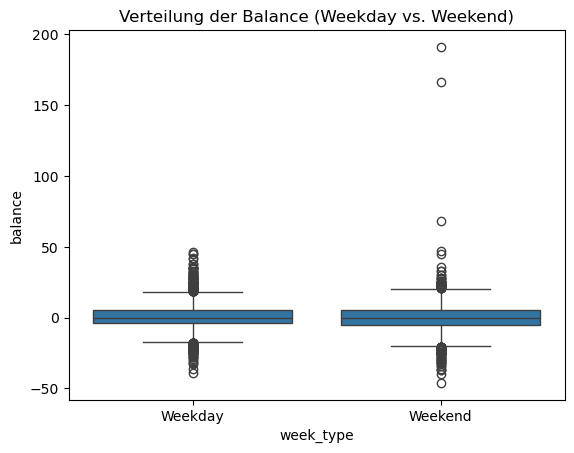

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=balance_df, x="week_type", y="balance")
plt.title("Verteilung der Balance (Weekday vs. Weekend)")
plt.show()

In [32]:
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

In [33]:
# Entfernen von Outliers basierend auf der IQR-Methode
Q1 = balance_df["balance"].quantile(0.25)
Q3 = balance_df["balance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

balance_df = balance_df[(balance_df["balance"] >= lower_bound) & (balance_df["balance"] <= upper_bound)]

  week_type  departures   arrivals   balance
0   Weekday   77.178600  77.581485  0.402885
1   Weekend   93.385007  93.489145  0.104138


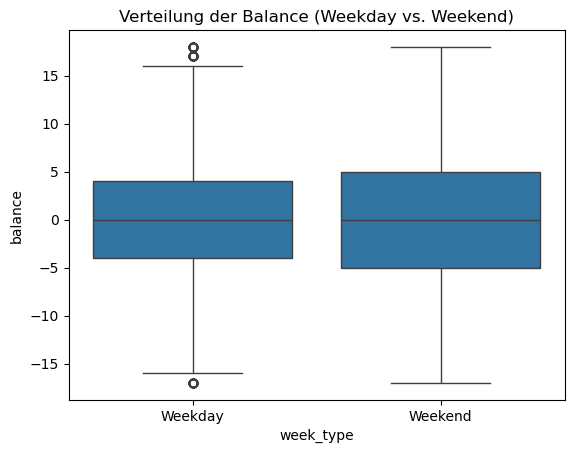

Anzahl der Datenpunkte an Wochentagen: 7486
Anzahl der Datenpunkte an Wochenenden: 2948


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Berechnung der Balance
balance_df["balance"] = balance_df["arrivals"] - balance_df["departures"]

# Durchschnittliche Balance nach Weekday und Weekend
avg_balance = balance_df.groupby("week_type")[["departures", "arrivals", "balance"]].mean().reset_index()
print(avg_balance)

# Visualisierung der Balance
sns.boxplot(data=balance_df, x="week_type", y="balance")
plt.title("Verteilung der Balance (Weekday vs. Weekend)")
plt.show()

# Überprüfen der Datenmengen
weekday_count = balance_df[balance_df["week_type"] == "Weekday"].shape[0]
weekend_count = balance_df[balance_df["week_type"] == "Weekend"].shape[0]

print(f"Anzahl der Datenpunkte an Wochentagen: {weekday_count}")
print(f"Anzahl der Datenpunkte an Wochenenden: {weekend_count}")